# Project Goal

The goal of this exercise is to analyze a dataset consisting of information from 5000 credit card holders and to comprehend which factors influence the Credit Card Balance of a cardholder and to predict the average spending of a given individual. Such an exercise could be conducted as part of a customer analysis within a credit card company. <br>
<br>
We will also form clusters based on our predictions and check which cluster has the least error between the actual spending and the predicted spending.

## Import the libraries

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
sns.set()

In [174]:
rcParams['font.family'] = 'comic sans ms'
rcParams['figure.figsize'] = (14, 8)
rcParams['lines.linewidth'] = 2.5
rcParams['xtick.labelsize'] = 'large'
rcParams['ytick.labelsize'] = 'large'

## Load the data

In [175]:
data = pd.read_excel("Data.xlsx")
data.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,union,employ,empcat,retire,income,lninc,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commute,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,cardspent,card2spent,active,bfast,tenure,churn,longmon,lnlongmon,longten,lnlongten,tollfree,tollmon,lntollmon,tollten,lntollten,equip,equipmon,lnequipmon,equipten,lnequipten,callcard,cardmon,lncardmon,cardten,lncardten,wireless,wiremon,lnwiremon,wireten,lnwireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2,1,20,2,September,15,3,1,1,0,1,0,31,3.433987,2,11.1,1.200909,0.183079,2.240091,0.806516,1,1,0,-1,-1,3,0,0,0,0,0,0,0,0,0,2,0,1,2,1,0,14.3,1,0,0,8,4,22.0,0,1,1,0,0,0,0,1,0,0,9,6,1,0,1,3,1,1,0,2,2,5,3,1,0,3,2,81.66,67.80,0,3,5,1,6.50,1.871802,34.40,3.538057,1,29.0,3.367296,161.05,5.081715,1,29.50,3.384390,126.1,4.837075,1,14.25,2.656757,60.0,4.094345,0,0.00,NaN,0.00,NaN,1,1,1,0,0,1,1,1,0,1,13,1,1,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5,0,22,2,May,17,4,2,0,0,1,0,15,2.708050,1,18.6,1.222020,0.200505,1.567980,0.449788,1,1,0,-1,-1,2,6,0,0,0,0,0,0,6,1,3,2,1,2,1,1,6.8,1,0,0,1,1,29.0,1,0,0,1,0,0,1,0,1,1,9,4,1,0,0,2,4,1,0,4,2,4,1,3,0,4,2,42.60,34.94,1,1,39,0,8.90,2.186051,330.60,5.800909,0,0.0,NaN,0.00,NaN,1,54.85,4.004602,1975.0,7.588324,1,16.00,2.772589,610.0,6.413459,1,45.65,3.821004,1683.55,7.428660,1,1,1,4,1,0,1,0,1,1,18,1,1,1,1,1,1,1,1,1,0,0,0
2,5195-TLUDJE-HVO,3,4,1,67,6,June,14,2,2,0,16,5,0,35,3.555348,2,9.9,0.928620,-0.074056,2.536380,0.930738,0,4,1,13,2,3,3,2,1,0,0,0,0,0,1,1,30,5,3,1,1,18.8,1,0,1,4,3,24.0,1,0,1,1,1,0,0,0,0,0,2,5,1,0,0,2,1,4,0,35,5,4,1,3,0,25,5,184.22,175.75,0,3,65,0,28.40,3.346389,1858.35,7.527444,0,0.0,NaN,0.00,NaN,0,0.00,NaN,0.0,NaN,1,23.00,3.135494,1410.0,7.251345,0,0.00,NaN,0.00,NaN,1,0,0,0,0,0,0,0,0,1,21,1,1,1,0,0,0,0,0,1,0,0,0
3,4459-VLPQUH-3OL,4,3,0,23,2,May,16,3,2,0,0,1,0,20,2.995732,1,5.7,0.022800,-3.780995,1.117200,0.110826,1,2,1,18,4,5,0,0,0,0,0,0,0,0,1,3,3,2,3,1,1,8.7,1,0,1,1,1,38.0,1,0,0,0,0,0,0,0,0,0,9,3,0,0,0,2,1,4,0,5,2,3,2,4,0,5,2,340.99,18.42,1,1,36,0,6.00,1.791759,199.45,5.295564,0,0.0,NaN,0.00,NaN,0,0.00,NaN,0.0,NaN,1,21.00,3.044522,685.0,6.529419,0,0.00,NaN,0.00,NaN,1,0,0,2,0,0,0,0,1,1,26,1,1,1,0,1,1,1,0,1,1,0,0
4,8158-SMTQFB-CNO,2,2,0,26,3,July,16,3,2,0,1,1,0,23,3.135494,1,1.7,0.214659,-1.538705,0.176341,-1.735336,0,1,1,13,2,4,0,0,0,0,0,0,0,0,0,2,3,2,1,0,1,10.6,1,0,1,6,3,32.0,0,0,0,0,0,1,0,1,0,0,9,4,0,0,0,4,2,1,0,8,3,1,3,2,0,9,3,255.10,252.73,1,3,21,0,3.05,1.115142,74.10,4.305416,1,16.5,2.803360,387.70,5.960232,0,0.00,NaN,0.0,NaN,1,17.25,2.847812,360.0,5.886104,1,19.05,2.947067,410.80,6.018106,0,1,0,3,1,1,1,1,0,1,27,1,1,1,0,1,0,1,0,0,0,1,0


In [176]:
data.shape

(5000, 130)

In [177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 130 entries, custid to response_03
dtypes: float64(30), int64(98), object(2)
memory usage: 5.0+ MB


In [178]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)

## Dropping ID feature

In [179]:
data.drop('custid', axis=1, inplace=True)
data.head()

,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,union,employ,empcat,retire,income,lninc,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commute,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,cardspent,card2spent,active,bfast,tenure,churn,longmon,lnlongmon,longten,lnlongten,tollfree,tollmon,lntollmon,tollten,lntollten,equip,equipmon,lnequipmon,equipten,lnequipten,callcard,cardmon,lncardmon,cardten,lncardten,wireless,wiremon,lnwiremon,wireten,lnwireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,1,2,1,20,2,September,15,3,1,1,0,1,0,31,3.433987,2,11.1,1.200909,0.183079,2.240091,0.806516,1,1,0,-1,-1,3,0,0,0,0,0,0,0,0,0,2,0,1,2,1,0,14.3,1,0,0,8,4,22.0,0,1,1,0,0,0,0,1,0,0,9,6,1,0,1,3,1,1,0,2,2,5,3,1,0,3,2,81.66,67.80,0,3,5,1,6.50,1.871802,34.40,3.538057,1,29.0,3.367296,161.05,5.081715,1,29.50,3.384390,126.1,4.837075,1,14.25,2.656757,60.0,4.094345,0,0.00,NaN,0.00,NaN,1,1,1,0,0,1,1,1,0,1,13,1,1,0,0,0,1,1,0,0,0,1,0
1,5,5,0,22,2,May,17,4,2,0,0,1,0,15,2.708050,1,18.6,1.222020,0.200505,1.567980,0.449788,1,1,0,-1,-1,2,6,0,0,0,0,0,0,6,1,3,2,1,2,1,1,6.8,1,0,0,1,1,29.0,1,0,0,1,0,0,1,0,1,1,9,4,1,0,0,2,4,1,0,4,2,4,1,3,0,4,2,42.60,34.94,1,1,39,0,8.90,2.186051,330.60,5.800909,0,0.0,NaN,0.00,NaN,1,54.85,4.004602,1975.0,7.588324,1,16.00,2.772589,610.0,6.413459,1,45.65,3.821004,1683.55,7.428660,1,1,1,4,1,0,1,0,1,1,18,1,1,1,1,1,1,1,1,1,0,0,0
2,3,4,1,67,6,June,14,2,2,0,16,5,0,35,3.555348,2,9.9,0.928620,-0.074056,2.536380,0.930738,0,4,1,13,2,3,3,2,1,0,0,0,0,0,1,1,30,5,3,1,1,18.8,1,0,1,4,3,24.0,1,0,1,1,1,0,0,0,0,0,2,5,1,0,0,2,1,4,0,35,5,4,1,3,0,25,5,184.22,175.75,0,3,65,0,28.40,3.346389,1858.35,7.527444,0,0.0,NaN,0.00,NaN,0,0.00,NaN,0.0,NaN,1,23.00,3.135494,1410.0,7.251345,0,0.00,NaN,0.00,NaN,1,0,0,0,0,0,0,0,0,1,21,1,1,1,0,0,0,0,0,1,0,0,0
3,4,3,0,23,2,May,16,3,2,0,0,1,0,20,2.995732,1,5.7,0.022800,-3.780995,1.117200,0.110826,1,2,1,18,4,5,0,0,0,0,0,0,0,0,1,3,3,2,3,1,1,8.7,1,0,1,1,1,38.0,1,0,0,0,0,0,0,0,0,0,9,3,0,0,0,2,1,4,0,5,2,3,2,4,0,5,2,340.99,18.42,1,1,36,0,6.00,1.791759,199.45,5.295564,0,0.0,NaN,0.00,NaN,0,0.00,NaN,0.0,NaN,1,21.00,3.044522,685.0,6.529419,0,0.00,NaN,0.00,NaN,1,0,0,2,0,0,0,0,1,1,26,1,1,1,0,1,1,1,0,1,1,0,0
4,2,2,0,26,3,July,16,3,2,0,1,1,0,23,3.135494,1,1.7,0.214659,-1.538705,0.176341,-1.735336,0,1,1,13,2,4,0,0,0,0,0,0,0,0,0,2,3,2,1,0,1,10.6,1,0,1,6,3,32.0,0,0,0,0,0,1,0,1,0,0,9,4,0,0,0,4,2,1,0,8,3,1,3,2,0,9,3,255.10,252.73,1,3,21,0,3.05,1.115142,74.10,4.305416,1,16.5,2.803360,387.70,5.960232,0,0.00,NaN,0.0,NaN,1,17.25,2.847812,360.0,5.886104,1,19.05,2.947067,410.80,6.018106,0,1,0,3,1,1,1,1,0,1,27,1,1,1,0,1,0,1,0,0,0,1,0


## Defining the dependent and independent features

In [180]:
data['totalspent'] = data['cardspent'] + data['card2spent']
data.drop(['card2spent','cardspent'], axis=1, inplace=True)
data.head()

,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,union,employ,empcat,retire,income,lninc,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commute,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,active,bfast,tenure,churn,longmon,lnlongmon,longten,lnlongten,tollfree,tollmon,lntollmon,tollten,lntollten,equip,equipmon,lnequipmon,equipten,lnequipten,callcard,cardmon,lncardmon,cardten,lncardten,wireless,wiremon,lnwiremon,wireten,lnwireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,totalspent
0,1,2,1,20,2,September,15,3,1,1,0,1,0,31,3.433987,2,11.1,1.200909,0.183079,2.240091,0.806516,1,1,0,-1,-1,3,0,0,0,0,0,0,0,0,0,2,0,1,2,1,0,14.3,1,0,0,8,4,22.0,0,1,1,0,0,0,0,1,0,0,9,6,1,0,1,3,1,1,0,2,2,5,3,1,0,3,2,0,3,5,1,6.50,1.871802,34.40,3.538057,1,29.0,3.367296,161.05,5.081715,1,29.50,3.384390,126.1,4.837075,1,14.25,2.656757,60.0,4.094345,0,0.00,NaN,0.00,NaN,1,1,1,0,0,1,1,1,0,1,13,1,1,0,0,0,1,1,0,0,0,1,0,149.46
1,5,5,0,22,2,May,17,4,2,0,0,1,0,15,2.708050,1,18.6,1.222020,0.200505,1.567980,0.449788,1,1,0,-1,-1,2,6,0,0,0,0,0,0,6,1,3,2,1,2,1,1,6.8,1,0,0,1,1,29.0,1,0,0,1,0,0,1,0,1,1,9,4,1,0,0,2,4,1,0,4,2,4,1,3,0,4,2,1,1,39,0,8.90,2.186051,330.60,5.800909,0,0.0,NaN,0.00,NaN,1,54.85,4.004602,1975.0,7.588324,1,16.00,2.772589,610.0,6.413459,1,45.65,3.821004,1683.55,7.428660,1,1,1,4,1,0,1,0,1,1,18,1,1,1,1,1,1,1,1,1,0,0,0,77.54
2,3,4,1,67,6,June,14,2,2,0,16,5,0,35,3.555348,2,9.9,0.928620,-0.074056,2.536380,0.930738,0,4,1,13,2,3,3,2,1,0,0,0,0,0,1,1,30,5,3,1,1,18.8,1,0,1,4,3,24.0,1,0,1,1,1,0,0,0,0,0,2,5,1,0,0,2,1,4,0,35,5,4,1,3,0,25,5,0,3,65,0,28.40,3.346389,1858.35,7.527444,0,0.0,NaN,0.00,NaN,0,0.00,NaN,0.0,NaN,1,23.00,3.135494,1410.0,7.251345,0,0.00,NaN,0.00,NaN,1,0,0,0,0,0,0,0,0,1,21,1,1,1,0,0,0,0,0,1,0,0,0,359.97
3,4,3,0,23,2,May,16,3,2,0,0,1,0,20,2.995732,1,5.7,0.022800,-3.780995,1.117200,0.110826,1,2,1,18,4,5,0,0,0,0,0,0,0,0,1,3,3,2,3,1,1,8.7,1,0,1,1,1,38.0,1,0,0,0,0,0,0,0,0,0,9,3,0,0,0,2,1,4,0,5,2,3,2,4,0,5,2,1,1,36,0,6.00,1.791759,199.45,5.295564,0,0.0,NaN,0.00,NaN,0,0.00,NaN,0.0,NaN,1,21.00,3.044522,685.0,6.529419,0,0.00,NaN,0.00,NaN,1,0,0,2,0,0,0,0,1,1,26,1,1,1,0,1,1,1,0,1,1,0,0,359.41
4,2,2,0,26,3,July,16,3,2,0,1,1,0,23,3.135494,1,1.7,0.214659,-1.538705,0.176341,-1.735336,0,1,1,13,2,4,0,0,0,0,0,0,0,0,0,2,3,2,1,0,1,10.6,1,0,1,6,3,32.0,0,0,0,0,0,1,0,1,0,0,9,4,0,0,0,4,2,1,0,8,3,1,3,2,0,9,3,1,3,21,0,3.05,1.115142,74.10,4.305416,1,16.5,2.803360,387.70,5.960232,0,0.00,NaN,0.0,NaN,1,17.25,2.847812,360.0,5.886104,1,19.05,2.947067,410.80,6.018106,0,1,0,3,1,1,1,1,0,1,27,1,1,1,0,1,0,1,0,0,0,1,0,507.83


We will see how our dependent variable is distributed.

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


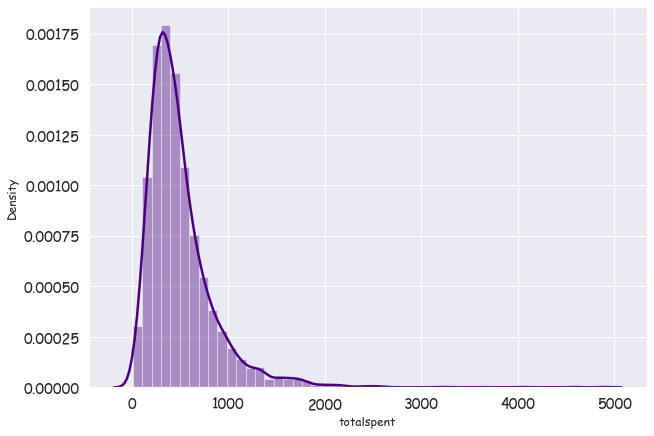

In [181]:
plt.figure(figsize=(10,7))
sns.distplot(data['totalspent'], color='indigo');

As we can see from the above plot, the total spend is heavily skewed(positively skewed) to the right. This means that there are a lot of people who spends a lot using their credit card. Most of the customers featured in this dataset has a spending limit of 1000 dollars.

We need to apply some kind of transformation to remove this skewness.

Let's try log transformation.

In [182]:
data['logtotalspent'] = np.log(data['totalspent'])
data.head()

,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,union,employ,empcat,retire,income,lninc,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commute,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,active,bfast,tenure,churn,longmon,lnlongmon,longten,lnlongten,tollfree,tollmon,lntollmon,tollten,lntollten,equip,equipmon,lnequipmon,equipten,lnequipten,callcard,cardmon,lncardmon,cardten,lncardten,wireless,wiremon,lnwiremon,wireten,lnwireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,totalspent,logtotalspent
0,1,2,1,20,2,September,15,3,1,1,0,1,0,31,3.433987,2,11.1,1.200909,0.183079,2.240091,0.806516,1,1,0,-1,-1,3,0,0,0,0,0,0,0,0,0,2,0,1,2,1,0,14.3,1,0,0,8,4,22.0,0,1,1,0,0,0,0,1,0,0,9,6,1,0,1,3,1,1,0,2,2,5,3,1,0,3,2,0,3,5,1,6.50,1.871802,34.40,3.538057,1,29.0,3.367296,161.05,5.081715,1,29.50,3.384390,126.1,4.837075,1,14.25,2.656757,60.0,4.094345,0,0.00,NaN,0.00,NaN,1,1,1,0,0,1,1,1,0,1,13,1,1,0,0,0,1,1,0,0,0,1,0,149.46,5.007029
1,5,5,0,22,2,May,17,4,2,0,0,1,0,15,2.708050,1,18.6,1.222020,0.200505,1.567980,0.449788,1,1,0,-1,-1,2,6,0,0,0,0,0,0,6,1,3,2,1,2,1,1,6.8,1,0,0,1,1,29.0,1,0,0,1,0,0,1,0,1,1,9,4,1,0,0,2,4,1,0,4,2,4,1,3,0,4,2,1,1,39,0,8.90,2.186051,330.60,5.800909,0,0.0,NaN,0.00,NaN,1,54.85,4.004602,1975.0,7.588324,1,16.00,2.772589,610.0,6.413459,1,45.65,3.821004,1683.55,7.428660,1,1,1,4,1,0,1,0,1,1,18,1,1,1,1,1,1,1,1,1,0,0,0,77.54,4.350794
2,3,4,1,67,6,June,14,2,2,0,16,5,0,35,3.555348,2,9.9,0.928620,-0.074056,2.536380,0.930738,0,4,1,13,2,3,3,2,1,0,0,0,0,0,1,1,30,5,3,1,1,18.8,1,0,1,4,3,24.0,1,0,1,1,1,0,0,0,0,0,2,5,1,0,0,2,1,4,0,35,5,4,1,3,0,25,5,0,3,65,0,28.40,3.346389,1858.35,7.527444,0,0.0,NaN,0.00,NaN,0,0.00,NaN,0.0,NaN,1,23.00,3.135494,1410.0,7.251345,0,0.00,NaN,0.00,NaN,1,0,0,0,0,0,0,0,0,1,21,1,1,1,0,0,0,0,0,1,0,0,0,359.97,5.886021
3,4,3,0,23,2,May,16,3,2,0,0,1,0,20,2.995732,1,5.7,0.022800,-3.780995,1.117200,0.110826,1,2,1,18,4,5,0,0,0,0,0,0,0,0,1,3,3,2,3,1,1,8.7,1,0,1,1,1,38.0,1,0,0,0,0,0,0,0,0,0,9,3,0,0,0,2,1,4,0,5,2,3,2,4,0,5,2,1,1,36,0,6.00,1.791759,199.45,5.295564,0,0.0,NaN,0.00,NaN,0,0.00,NaN,0.0,NaN,1,21.00,3.044522,685.0,6.529419,0,0.00,NaN,0.00,NaN,1,0,0,2,0,0,0,0,1,1,26,1,1,1,0,1,1,1,0,1,1,0,0,359.41,5.884464
4,2,2,0,26,3,July,16,3,2,0,1,1,0,23,3.135494,1,1.7,0.214659,-1.538705,0.176341,-1.735336,0,1,1,13,2,4,0,0,0,0,0,0,0,0,0,2,3,2,1,0,1,10.6,1,0,1,6,3,32.0,0,0,0,0,0,1,0,1,0,0,9,4,0,0,0,4,2,1,0,8,3,1,3,2,0,9,3,1,3,21,0,3.05,1.115142,74.10,4.305416,1,16.5,2.803360,387.70,5.960232,0,0.00,NaN,0.0,NaN,1,17.25,2.847812,360.0,5.886104,1,19.05,2.947067,410.80,6.018106,0,1,0,3,1,1,1,1,0,1,27,1,1,1,0,1,0,1,0,0,0,1,0,507.83,6.230147


D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


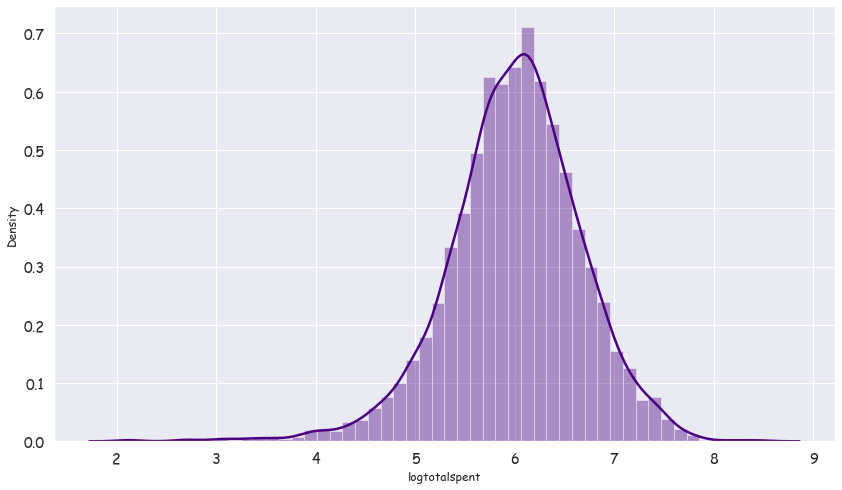

In [183]:
sns.distplot(data['logtotalspent'], color='indigo');

Much better. As we can see the positive skewness is removed but the distribution still seems to be a little skewed to the left.
Let's try another one. 

We will use Box-Cox Transform. Let's see how that works out.

In [184]:
from scipy import stats
from scipy.special import inv_boxcox

data['boxcox_totalspent'], param = stats.boxcox(data['totalspent'])
print('param: ', param)

param:  0.17811871936715304


In [185]:
# crim_inv_boxcox = inv_boxcox(crim_boxcox, param)
# crim_inv_boxcox = pd.Series(crim_inv_boxcox, index = data.index)
# data['Inverted_boxcox'] = crim_inv_boxcox
# data.drop('Inverted_boxcox', axis=1, inplace=True)

data.head(10)


,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,union,employ,empcat,retire,income,lninc,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commute,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,active,bfast,tenure,churn,longmon,lnlongmon,longten,lnlongten,tollfree,tollmon,lntollmon,tollten,lntollten,equip,equipmon,lnequipmon,equipten,lnequipten,callcard,cardmon,lncardmon,cardten,lncardten,wireless,wiremon,lnwiremon,wireten,lnwireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,totalspent,logtotalspent,boxcox_totalspent
0,1,2,1,20,2,September,15,3,1,1,0,1,0,31,3.433987,2,11.1,1.200909,0.183079,2.240091,0.806516,1,1,0,-1,-1,3,0,0,0,0,0,0,0,0,0,2,0,1,2,1,0,14.3,1,0,0,8,4,22.0,0,1,1,0,0,0,0,1,0,0,9,6,1,0,1,3,1,1,0,2,2,5,3,1,0,3,2,0,3,5,1,6.50,1.871802,34.40,3.538057,1,29.00,3.367296,161.05,5.081715,1,29.50,3.384390,126.10,4.837075,1,14.25,2.656757,60.0,4.094345,0,0.00,NaN,0.00,NaN,1,1,1,0,0,1,1,1,0,1,13,1,1,0,0,0,1,1,0,0,0,1,0,149.46,5.007029,8.082407
1,5,5,0,22,2,May,17,4,2,0,0,1,0,15,2.708050,1,18.6,1.222020,0.200505,1.567980,0.449788,1,1,0,-1,-1,2,6,0,0,0,0,0,0,6,1,3,2,1,2,1,1,6.8,1,0,0,1,1,29.0,1,0,0,1,0,0,1,0,1,1,9,4,1,0,0,2,4,1,0,4,2,4,1,3,0,4,2,1,1,39,0,8.90,2.186051,330.60,5.800909,0,0.00,NaN,0.00,NaN,1,54.85,4.004602,1975.00,7.588324,1,16.00,2.772589,610.0,6.413459,1,45.65,3.821004,1683.55,7.428660,1,1,1,4,1,0,1,0,1,1,18,1,1,1,1,1,1,1,1,1,0,0,0,77.54,4.350794,6.571463
2,3,4,1,67,6,June,14,2,2,0,16,5,0,35,3.555348,2,9.9,0.928620,-0.074056,2.536380,0.930738,0,4,1,13,2,3,3,2,1,0,0,0,0,0,1,1,30,5,3,1,1,18.8,1,0,1,4,3,24.0,1,0,1,1,1,0,0,0,0,0,2,5,1,0,0,2,1,4,0,35,5,4,1,3,0,25,5,0,3,65,0,28.40,3.346389,1858.35,7.527444,0,0.00,NaN,0.00,NaN,0,0.00,NaN,0.00,NaN,1,23.00,3.135494,1410.0,7.251345,0,0.00,NaN,0.00,NaN,1,0,0,0,0,0,0,0,0,1,21,1,1,1,0,0,0,0,0,1,0,0,0,359.97,5.886021,10.403805
3,4,3,0,23,2,May,16,3,2,0,0,1,0,20,2.995732,1,5.7,0.022800,-3.780995,1.117200,0.110826,1,2,1,18,4,5,0,0,0,0,0,0,0,0,1,3,3,2,3,1,1,8.7,1,0,1,1,1,38.0,1,0,0,0,0,0,0,0,0,0,9,3,0,0,0,2,1,4,0,5,2,3,2,4,0,5,2,1,1,36,0,6.00,1.791759,199.45,5.295564,0,0.00,NaN,0.00,NaN,0,0.00,NaN,0.00,NaN,1,21.00,3.044522,685.0,6.529419,0,0.00,NaN,0.00,NaN,1,0,0,2,0,0,0,0,1,1,26,1,1,1,0,1,1,1,0,1,1,0,0,359.41,5.884464,10.399363
4,2,2,0,26,3,July,16,3,2,0,1,1,0,23,3.135494,1,1.7,0.214659,-1.538705,0.176341,-1.735336,0,1,1,13,2,4,0,0,0,0,0,0,0,0,0,2,3,2,1,0,1,10.6,1,0,1,6,3,32.0,0,0,0,0,0,1,0,1,0,0,9,4,0,0,0,4,2,1,0,8,3,1,3,2,0,9,3,1,3,21,0,3.05,1.115142,74.10,4.305416,1,16.50,2.803360,387.70,5.960232,0,0.00,NaN,0.00,NaN,1,17.25,2.847812,360.0,5.886104,1,19.05,2.947067,410.80,6.018106,0,1,0,3,1,1,1,1,0,1,27,1,1,1,0,1,0,1,0,0,0,1,0,507.83,6.230147,11.416350
5,4,4,0,64,5,August,17,4,3,0,22,5,0,107,4.672829,4,5.6,1.060584,0.058820,4.931416,1.595626,0,2,0,-1,-1,1,11,1,1,0,0,2,0,7,1,1,31,5,0,-1,-1,-1.0,-1,-1,0,8,4,23.0,0,0,0,0,1,0,0,1,0,0,9,4,0,0,0,2,4,1,1,18,5,3,3,2,1,9,3,0,3,28,0,8.10,2.091864,264.90,5.579352,1,26.75,3.286534,726.60,6.588376,1,35.50,3.569533,970.95,6.878275,1,28.25,3.341093,765.0,6.639876,0,0.00,NaN,0.00,NaN,0,0,1,0,1,1,1,1,0,1,21,1,1,1,1,0,0,0,0,0,0,1,0,228.27,5.430529,9.155557
6,2,5,1,52,5,July,14,2,1,0,10,3,0,77,4.343805,4,1.9,0.501809,-0.689536,0.961191,-0.039582,0,2,0,-1,-1,1,2,0,2,0,0,0,0,0,0,3,21,4,2,1,0,25.6,2,1,0,4,3,32.0,1,0,0,1,0,0,1,1,0,0,9,4,0,0,0,5,3,1,1,3,2,2,3,4,0,2,2,0,2,15,0,3.80,1.335001,44.80,3.802208

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


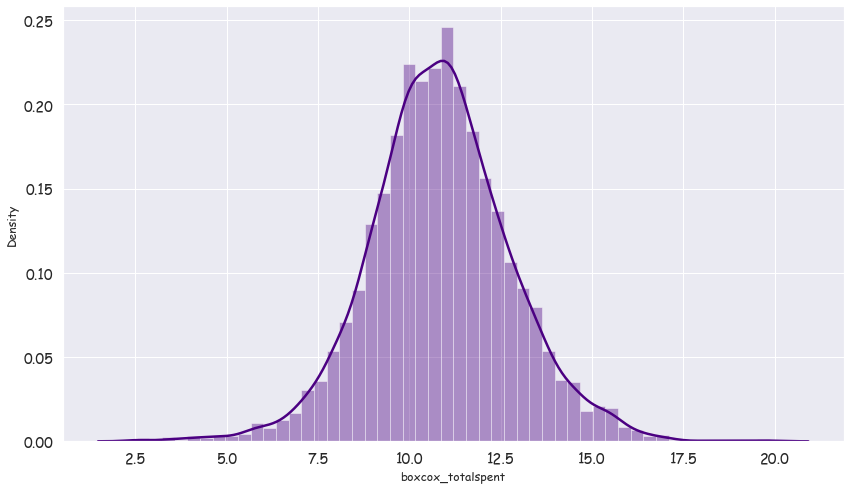

In [186]:
sns.distplot(data['boxcox_totalspent'], color='indigo');

If we compare the log transform and the boxcox transformation, we can see that the latter one is more normally distributed.
So we will go forward with the BoxCox transformation and reject the log transformation. 

Dropping the logtotalspent column and the original totalspent column from the dataset,

In [187]:
original_totalspent = data['totalspent']
data.drop(['totalspent', 'logtotalspent'], axis=1, inplace=True)
data.head(10)

,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,union,employ,empcat,retire,income,lninc,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commute,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,active,bfast,tenure,churn,longmon,lnlongmon,longten,lnlongten,tollfree,tollmon,lntollmon,tollten,lntollten,equip,equipmon,lnequipmon,equipten,lnequipten,callcard,cardmon,lncardmon,cardten,lncardten,wireless,wiremon,lnwiremon,wireten,lnwireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,boxcox_totalspent
0,1,2,1,20,2,September,15,3,1,1,0,1,0,31,3.433987,2,11.1,1.200909,0.183079,2.240091,0.806516,1,1,0,-1,-1,3,0,0,0,0,0,0,0,0,0,2,0,1,2,1,0,14.3,1,0,0,8,4,22.0,0,1,1,0,0,0,0,1,0,0,9,6,1,0,1,3,1,1,0,2,2,5,3,1,0,3,2,0,3,5,1,6.50,1.871802,34.40,3.538057,1,29.00,3.367296,161.05,5.081715,1,29.50,3.384390,126.10,4.837075,1,14.25,2.656757,60.0,4.094345,0,0.00,NaN,0.00,NaN,1,1,1,0,0,1,1,1,0,1,13,1,1,0,0,0,1,1,0,0,0,1,0,8.082407
1,5,5,0,22,2,May,17,4,2,0,0,1,0,15,2.708050,1,18.6,1.222020,0.200505,1.567980,0.449788,1,1,0,-1,-1,2,6,0,0,0,0,0,0,6,1,3,2,1,2,1,1,6.8,1,0,0,1,1,29.0,1,0,0,1,0,0,1,0,1,1,9,4,1,0,0,2,4,1,0,4,2,4,1,3,0,4,2,1,1,39,0,8.90,2.186051,330.60,5.800909,0,0.00,NaN,0.00,NaN,1,54.85,4.004602,1975.00,7.588324,1,16.00,2.772589,610.0,6.413459,1,45.65,3.821004,1683.55,7.428660,1,1,1,4,1,0,1,0,1,1,18,1,1,1,1,1,1,1,1,1,0,0,0,6.571463
2,3,4,1,67,6,June,14,2,2,0,16,5,0,35,3.555348,2,9.9,0.928620,-0.074056,2.536380,0.930738,0,4,1,13,2,3,3,2,1,0,0,0,0,0,1,1,30,5,3,1,1,18.8,1,0,1,4,3,24.0,1,0,1,1,1,0,0,0,0,0,2,5,1,0,0,2,1,4,0,35,5,4,1,3,0,25,5,0,3,65,0,28.40,3.346389,1858.35,7.527444,0,0.00,NaN,0.00,NaN,0,0.00,NaN,0.00,NaN,1,23.00,3.135494,1410.0,7.251345,0,0.00,NaN,0.00,NaN,1,0,0,0,0,0,0,0,0,1,21,1,1,1,0,0,0,0,0,1,0,0,0,10.403805
3,4,3,0,23,2,May,16,3,2,0,0,1,0,20,2.995732,1,5.7,0.022800,-3.780995,1.117200,0.110826,1,2,1,18,4,5,0,0,0,0,0,0,0,0,1,3,3,2,3,1,1,8.7,1,0,1,1,1,38.0,1,0,0,0,0,0,0,0,0,0,9,3,0,0,0,2,1,4,0,5,2,3,2,4,0,5,2,1,1,36,0,6.00,1.791759,199.45,5.295564,0,0.00,NaN,0.00,NaN,0,0.00,NaN,0.00,NaN,1,21.00,3.044522,685.0,6.529419,0,0.00,NaN,0.00,NaN,1,0,0,2,0,0,0,0,1,1,26,1,1,1,0,1,1,1,0,1,1,0,0,10.399363
4,2,2,0,26,3,July,16,3,2,0,1,1,0,23,3.135494,1,1.7,0.214659,-1.538705,0.176341,-1.735336,0,1,1,13,2,4,0,0,0,0,0,0,0,0,0,2,3,2,1,0,1,10.6,1,0,1,6,3,32.0,0,0,0,0,0,1,0,1,0,0,9,4,0,0,0,4,2,1,0,8,3,1,3,2,0,9,3,1,3,21,0,3.05,1.115142,74.10,4.305416,1,16.50,2.803360,387.70,5.960232,0,0.00,NaN,0.00,NaN,1,17.25,2.847812,360.0,5.886104,1,19.05,2.947067,410.80,6.018106,0,1,0,3,1,1,1,1,0,1,27,1,1,1,0,1,0,1,0,0,0,1,0,11.416350
5,4,4,0,64,5,August,17,4,3,0,22,5,0,107,4.672829,4,5.6,1.060584,0.058820,4.931416,1.595626,0,2,0,-1,-1,1,11,1,1,0,0,2,0,7,1,1,31,5,0,-1,-1,-1.0,-1,-1,0,8,4,23.0,0,0,0,0,1,0,0,1,0,0,9,4,0,0,0,2,4,1,1,18,5,3,3,2,1,9,3,0,3,28,0,8.10,2.091864,264.90,5.579352,1,26.75,3.286534,726.60,6.588376,1,35.50,3.569533,970.95,6.878275,1,28.25,3.341093,765.0,6.639876,0,0.00,NaN,0.00,NaN,0,0,1,0,1,1,1,1,0,1,21,1,1,1,1,0,0,0,0,0,0,1,0,9.155557
6,2,5,1,52,5,July,14,2,1,0,10,3,0,77,4.343805,4,1.9,0.501809,-0.689536,0.961191,-0.039582,0,2,0,-1,-1,1,2,0,2,0,0,0,0,0,0,3,21,4,2,1,0,25.6,2,1,0,4,3,32.0,1,0,0,1,0,0,1,1,0,0,9,4,0,0,0,5,3,1,1,3,2,2,3,4,0,2,2,0,2,15,0,3.80,1.335001,44.80,3.802208,0,0.00,NaN,0.00,NaN,0,0.00,NaN,0.00,NaN,0,0.00,NaN,0.0,NaN,0,0.00,NaN,0.00,NaN,0,0,0,1,0,0,1,0,0,1,19,1,1,1,0,1,1,0,0,0

In [188]:
# defining the dependent and independent features
x = data.drop('boxcox_totalspent', axis=1)
x.head()

,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,union,employ,empcat,retire,income,lninc,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commute,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,active,bfast,tenure,churn,longmon,lnlongmon,longten,lnlongten,tollfree,tollmon,lntollmon,tollten,lntollten,equip,equipmon,lnequipmon,equipten,lnequipten,callcard,cardmon,lncardmon,cardten,lncardten,wireless,wiremon,lnwiremon,wireten,lnwireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,1,2,1,20,2,September,15,3,1,1,0,1,0,31,3.433987,2,11.1,1.200909,0.183079,2.240091,0.806516,1,1,0,-1,-1,3,0,0,0,0,0,0,0,0,0,2,0,1,2,1,0,14.3,1,0,0,8,4,22.0,0,1,1,0,0,0,0,1,0,0,9,6,1,0,1,3,1,1,0,2,2,5,3,1,0,3,2,0,3,5,1,6.50,1.871802,34.40,3.538057,1,29.0,3.367296,161.05,5.081715,1,29.50,3.384390,126.1,4.837075,1,14.25,2.656757,60.0,4.094345,0,0.00,NaN,0.00,NaN,1,1,1,0,0,1,1,1,0,1,13,1,1,0,0,0,1,1,0,0,0,1,0
1,5,5,0,22,2,May,17,4,2,0,0,1,0,15,2.708050,1,18.6,1.222020,0.200505,1.567980,0.449788,1,1,0,-1,-1,2,6,0,0,0,0,0,0,6,1,3,2,1,2,1,1,6.8,1,0,0,1,1,29.0,1,0,0,1,0,0,1,0,1,1,9,4,1,0,0,2,4,1,0,4,2,4,1,3,0,4,2,1,1,39,0,8.90,2.186051,330.60,5.800909,0,0.0,NaN,0.00,NaN,1,54.85,4.004602,1975.0,7.588324,1,16.00,2.772589,610.0,6.413459,1,45.65,3.821004,1683.55,7.428660,1,1,1,4,1,0,1,0,1,1,18,1,1,1,1,1,1,1,1,1,0,0,0
2,3,4,1,67,6,June,14,2,2,0,16,5,0,35,3.555348,2,9.9,0.928620,-0.074056,2.536380,0.930738,0,4,1,13,2,3,3,2,1,0,0,0,0,0,1,1,30,5,3,1,1,18.8,1,0,1,4,3,24.0,1,0,1,1,1,0,0,0,0,0,2,5,1,0,0,2,1,4,0,35,5,4,1,3,0,25,5,0,3,65,0,28.40,3.346389,1858.35,7.527444,0,0.0,NaN,0.00,NaN,0,0.00,NaN,0.0,NaN,1,23.00,3.135494,1410.0,7.251345,0,0.00,NaN,0.00,NaN,1,0,0,0,0,0,0,0,0,1,21,1,1,1,0,0,0,0,0,1,0,0,0
3,4,3,0,23,2,May,16,3,2,0,0,1,0,20,2.995732,1,5.7,0.022800,-3.780995,1.117200,0.110826,1,2,1,18,4,5,0,0,0,0,0,0,0,0,1,3,3,2,3,1,1,8.7,1,0,1,1,1,38.0,1,0,0,0,0,0,0,0,0,0,9,3,0,0,0,2,1,4,0,5,2,3,2,4,0,5,2,1,1,36,0,6.00,1.791759,199.45,5.295564,0,0.0,NaN,0.00,NaN,0,0.00,NaN,0.0,NaN,1,21.00,3.044522,685.0,6.529419,0,0.00,NaN,0.00,NaN,1,0,0,2,0,0,0,0,1,1,26,1,1,1,0,1,1,1,0,1,1,0,0
4,2,2,0,26,3,July,16,3,2,0,1,1,0,23,3.135494,1,1.7,0.214659,-1.538705,0.176341,-1.735336,0,1,1,13,2,4,0,0,0,0,0,0,0,0,0,2,3,2,1,0,1,10.6,1,0,1,6,3,32.0,0,0,0,0,0,1,0,1,0,0,9,4,0,0,0,4,2,1,0,8,3,1,3,2,0,9,3,1,3,21,0,3.05,1.115142,74.10,4.305416,1,16.5,2.803360,387.70,5.960232,0,0.00,NaN,0.0,NaN,1,17.25,2.847812,360.0,5.886104,1,19.05,2.947067,410.80,6.018106,0,1,0,3,1,1,1,1,0,1,27,1,1,1,0,1,0,1,0,0,0,1,0


In [189]:
y = data['boxcox_totalspent']
y

0        8.082407
1        6.571463
2       10.403805
3       10.399363
4       11.416350
          ...    
4995    14.853996
4996    10.454008
4997    15.107676
4998    12.653991
4999    10.764162
Name: boxcox_totalspent, Length: 5000, dtype: float64

In [190]:
y.mean(), y.median()

(10.851000020639743, 10.809575762767754)

In [191]:
y.skew()

0.03865637244932173

## Data Preprocessing

### Split the data into numerical and categorical columns

We get the names of all the categorical columns from the data dictionary that is provided

In [192]:
cat_var=['region','townsize','gender','agecat','birthmonth','edcat','jobcat','union',
'employ','empcat','retire','inccat','default','jobsat','marital','spousedcat',
'homeown','hometype','address','addresscat','cars','carown','cartype',
'carcatvalue','carbought','carbuy','commute','commutecat','commutecar','commutemotorcycle',
'commutecarpool','commutebus','commuterail','commutepublic','commutebike','commutewalk',
'commutenonmotor','telecommute','reason','polview','polparty','polcontrib','vote','card',
'cardtype','cardbenefit','cardfee','cardtenure','cardtenurecat','card2','card2type',
'card2benefit','card2fee','card2tenure','card2tenurecat','active','bfast','churn','tollfree',
'equip','callcard','wireless','multline','voice','pager','internet','callid','callwait','forward',
'confer','ebill','owntv','ownvcr','owndvd','owncd','ownpda','ownpc','ownipod','owngame','ownfax','news',
'response_01','response_02','response_03']

In [193]:
numerical_var = []

for i in x.columns:
    if i not in cat_var:
        numerical_var.append(i)
        
print(numerical_var)

['age', 'ed', 'income', 'lninc', 'debtinc', 'creddebt', 'lncreddebt', 'othdebt', 'lnothdebt', 'spoused', 'reside', 'pets', 'pets_cats', 'pets_dogs', 'pets_birds', 'pets_reptiles', 'pets_small', 'pets_saltfish', 'pets_freshfish', 'carvalue', 'commutetime', 'tenure', 'longmon', 'lnlongmon', 'longten', 'lnlongten', 'tollmon', 'lntollmon', 'tollten', 'lntollten', 'equipmon', 'lnequipmon', 'equipten', 'lnequipten', 'cardmon', 'lncardmon', 'cardten', 'lncardten', 'wiremon', 'lnwiremon', 'wireten', 'lnwireten', 'hourstv']


In [194]:
num = x.drop(cat_var, axis=1)
char = x.drop(numerical_var, axis=1)

In [195]:
# basically we are making sure that all the columns in the char dataset contains only categorical columns 
# i.e with object datatype

all_columns = list(char) # creates a list of column headers
char[all_columns] = char[all_columns].astype('object')
char.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 84 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   region             5000 non-null   object
 1   townsize           5000 non-null   object
 2   gender             5000 non-null   object
 3   agecat             5000 non-null   object
 4   birthmonth         5000 non-null   object
 5   edcat              5000 non-null   object
 6   jobcat             5000 non-null   object
 7   union              5000 non-null   object
 8   employ             5000 non-null   object
 9   empcat             5000 non-null   object
 10  retire             5000 non-null   object
 11  inccat             5000 non-null   object
 12  default            5000 non-null   object
 13  jobsat             5000 non-null   object
 14  marital            5000 non-null   object
 15  spousedcat         5000 non-null   object
 16  homeown            5000 non-null   object


In [196]:
print ("The shape of numerical dataframe :",num.shape)
print ("The shape of categorical datafrme :",char.shape)

The shape of numerical dataframe : (5000, 43)
The shape of categorical datafrme : (5000, 84)


### Check for Descriptive Statistics

We are removing the top 1% and the bottom 1% of our dataset

In [197]:
num.describe(percentiles=[0.01,0.05,0.25,0.50,0.75,0.95,0.99])

,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,carvalue,commutetime,tenure,longmon,lnlongmon,longten,lnlongten,tollmon,lntollmon,tollten,lntollten,equipmon,lnequipmon,equipten,lnequipten,cardmon,lncardmon,cardten,lncardten,wiremon,lnwiremon,wireten,lnwireten,hourstv
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4999.000000,5000.000000,4999.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4998.000000,5000.000000,5000.000000,5000.000000,4997.000000,4997.000000,5000.000000,2378.000000,5000.000000,2378.000000,5000.000000,1704.000000,5000.000000,1704.000000,5000.000000,3581.000000,4998.000000,3578.000000,5000.000000,1344.000000,5000.000000,1344.000000,5000.000000
mean,47.025600,14.543000,54.759600,3.699909,9.954160,1.857326,-0.130454,3.654460,0.696915,6.112800,2.204000,3.067400,0.500400,0.392400,0.110400,0.055600,0.114600,0.046600,1.847400,23.232580,25.345538,38.204800,13.471450,2.288779,708.871753,5.611298,13.264450,3.243230,577.832510,6.584783,12.991310,3.600238,470.176400,6.747296,15.443850,2.909733,720.478391,6.426309,10.701190,3.605001,421.984610,6.808132,19.645000
std,17.770338,3.281083,55.377511,0.747072,6.399783,3.415732,1.273058,5.395172,1.128578,7.743518,1.393977,3.414497,0.860783,0.796084,0.494227,0.325776,0.568798,0.469545,3.074801,21.231637,5.879149,22.661888,12.773381,0.775178,979.291072,1.649308,16.310018,0.404659,949.151586,1.222040,19.212943,0.283385,912.220624,1.199234,15.007569,0.564859,922.225527,1.172050,19.799837,0.390102,1001.003287,1.283967,5.165609
min,18.000000,6.000000,9.000000,2.197225,0.000000,0.000000,-6.597334,0.000000,-4.092107,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,8.000000,0.000000,0.900000,-0.105361,0.900000,-0.105361,0.000000,2.079442,0.000000,2.169054,0.000000,2.833213,0.000000,2.489065,0.000000,1.178655,0.000000,1.558145,0.000000,2.541602,0.000000,2.541602,0.000000
1%,18.000000,8.000000,9.000000,2.197225,0.700000,0.033160,-3.401690,0.114299,-2.168241,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,13.000000,1.000000,1.850000,0.615186,2.400000,0.875469,0.000000,2.345833,0.000000,2.784527,0.000000,2.967847,0.000000,3.169937,0.000000,1.658228,0.000000,2.484907,0.000000,2.806811,0.000000,3.039749,0.000000
5%,20.000000,9.000000,13.000000,2.564949,1.900000,0.101088,-2.291604,0.287692,-1.243483,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,16.000000,4.000000,2.900000,1.064711,12.620000,2.535272,0.000000,2.583998,0.000000,4.208490,0.000000,3.139833,0.000000,4.251230,0.000000,1.981001,0.000000,4.094345,0.000000,2.992964,0.000000,4.114134,12.000000
25%,31.000000,12.000000,24.000000,3.178054,5.100000,0.385520,-0.952685,0.980301,-0.018987,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.200000,21.000000,18.000000,5.700000,1.740466,104.600000,4.650144,0.000000,2.970414,0.000000,5.912218,0.000000,3.412797,0.000000,6.171570,0.000000,2.545531,0.000000,5.857933,0.000000,3.330417,0.000000,6.158091,17.000000
50%,47.000000,14.000000,38.000000,3.637586,8.800000,0.926437,-0.076106,2.098540,0.741537,-1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,25.000000,38.000000,9.550000,2.256541,350.000000,5.857933,0.000000,3.228826,0.000000,6.858013,0.000000,3.598681,0.000000,7.050556,13.750000,2.904165,425.000000,6.639876,0.000000,3.597997,0.000000,7.147185,20.000000
75%,62.000000,17.000000,67.000000,4.204693,13.600000,2.063820,0.724665,4.314780,1.462053,14.000000,3.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,31.100000,29.000000,59.000000,16.550000,2.806386,913.850000,6.817666,24.500000,3

In [198]:
def outlier_cap(x):
    x = x.clip(upper=x.quantile(0.99))
    x = x.clip(lower=x.quantile(0.01))
    return x

In [199]:
num = num.apply(lambda x: outlier_cap(x))


In [200]:
num.describe(percentiles=[0.01,0.05,0.25,0.50,0.75,0.95,0.99])

,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,carvalue,commutetime,tenure,longmon,lnlongmon,longten,lnlongten,tollmon,lntollmon,tollten,lntollten,equipmon,lnequipmon,equipten,lnequipten,cardmon,lncardmon,cardten,lncardten,wiremon,lnwiremon,wireten,lnwireten,hourstv
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4999.000000,5000.000000,4999.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,4998.000000,5000.00000,5000.00000,5000.000000,4997.000000,4997.000000,5000.000000,2378.000000,5000.000000,2378.000000,5000.000000,1704.000000,5000.000000,1704.000000,5000.000000,3581.000000,4998.000000,3578.000000,5000.00000,1344.000000,5000.000000,1344.000000,5000.00000
mean,47.025600,14.544200,53.629900,3.697049,9.914120,1.758369,-0.127780,3.522506,0.698386,6.095400,2.194200,3.049200,0.490400,0.382800,0.106000,0.05000,0.102800,0.022600,1.834800,23.202230,25.332233,38.20540,13.27264,2.288612,694.322373,5.612272,13.140075,3.242727,570.130195,6.585937,12.908715,3.599725,463.398395,6.747846,15.266950,2.909082,707.239096,6.429558,10.53027,3.604226,409.960020,6.808151,19.62660
std,17.770338,3.242553,46.567698,0.738495,6.241691,2.380681,1.241398,4.221760,1.104530,7.709565,1.361491,3.351213,0.822462,0.754969,0.462609,0.27334,0.483196,0.209995,3.031262,21.129844,5.755862,22.66089,11.55169,0.762861,892.957835,1.634288,15.811442,0.398743,914.744043,1.211028,18.955975,0.278360,882.832804,1.190092,14.156339,0.555100,848.339901,1.146504,19.02128,0.382289,930.007398,1.273410,5.11922
min,18.000000,8.000000,9.000000,2.197225,0.700000,0.033160,-3.401690,0.114299,-2.168241,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-1.000000,13.000000,1.00000,1.85000,0.615186,2.400000,0.875469,0.000000,2.345833,0.000000,2.784527,0.000000,2.967847,0.000000,3.169937,0.000000,1.658228,0.000000,2.484907,0.00000,2.806811,0.000000,3.039749,0.00000
1%,18.000000,8.000000,9.000000,2.197225,0.700000,0.033166,-3.401599,0.114312,-2.168229,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-1.000000,13.000000,1.00000,1.85000,0.615186,2.400000,0.875469,0.000000,2.350100,0.000000,2.787273,0.000000,2.967847,0.000000,3.170180,0.000000,1.658228,0.000000,2.484907,0.00000,2.810508,0.000000,3.039749,0.00000
5%,20.000000,9.000000,13.000000,2.564949,1.900000,0.101088,-2.291604,0.287692,-1.243483,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-1.000000,16.000000,4.00000,2.90000,1.064711,12.620000,2.535272,0.000000,2.583998,0.000000,4.208490,0.000000,3.139833,0.000000,4.251230,0.000000,1.981001,0.000000,4.094345,0.00000,2.992964,0.000000,4.114134,12.00000
25%,31.000000,12.000000,24.000000,3.178054,5.100000,0.385520,-0.952685,0.980301,-0.018987,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,9.200000,21.000000,18.00000,5.70000,1.740466,104.600000,4.650144,0.000000,2.970414,0.000000,5.912218,0.000000,3.412797,0.000000,6.171570,0.000000,2.545531,0.000000,5.857933,0.00000,3.330417,0.000000,6.158091,17.00000
50%,47.000000,14.000000,38.000000,3.637586,8.800000,0.926437,-0.076106,2.098540,0.741537,-1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,17.000000,25.000000,38.00000,9.55000,2.256541,350.000000,5.857933,0.000000,3.228826,0.000000,6.858013,0.000000,3.598681,0.000000,7.050556,13.750000,2.904165,425.000000,6.639876,0.00000,3.597997,0.000000,7.147185,20.00000
75%,62.000000,17.000000,67.000000,4.204693,13.600000,2.063820,0.724665,4.314780,1.462053,14.000000,3.000000,5.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,4.000000,31.100000,29.000000,59.00000,16.55000,2.806386,913.850000,6.817666,24.500000,3.518980,885.450000,7.459900,30.800000,3.79013

### Missing Value Handling - Numerical Features

In [201]:
# let's check how many missing values are there

num.isnull().mean()

age               0.0000
ed                0.0000
income            0.0000
lninc             0.0000
debtinc           0.0000
creddebt          0.0000
lncreddebt        0.0002
othdebt           0.0000
lnothdebt         0.0002
spoused           0.0000
reside            0.0000
pets              0.0000
pets_cats         0.0000
pets_dogs         0.0000
pets_birds        0.0000
pets_reptiles     0.0000
pets_small        0.0000
pets_saltfish     0.0000
pets_freshfish    0.0000
carvalue          0.0000
commutetime       0.0004
tenure            0.0000
longmon           0.0000
lnlongmon         0.0000
longten           0.0006
lnlongten         0.0006
tollmon           0.0000
lntollmon         0.5244
tollten           0.0000
lntollten         0.5244
equipmon          0.0000
lnequipmon        0.6592
equipten          0.0000
lnequipten        0.6592
cardmon           0.0000
lncardmon         0.2838
cardten           0.0004
lncardten         0.2844
wiremon           0.0000
lnwiremon         0.7312


In [202]:
# we will remove all the columns whose percentage of missing values is greater than 25%

num = num.loc[:, num.isnull().mean() <= 0.25]

In [203]:
num.isnull().mean()

age               0.0000
ed                0.0000
income            0.0000
lninc             0.0000
debtinc           0.0000
creddebt          0.0000
lncreddebt        0.0002
othdebt           0.0000
lnothdebt         0.0002
spoused           0.0000
reside            0.0000
pets              0.0000
pets_cats         0.0000
pets_dogs         0.0000
pets_birds        0.0000
pets_reptiles     0.0000
pets_small        0.0000
pets_saltfish     0.0000
pets_freshfish    0.0000
carvalue          0.0000
commutetime       0.0004
tenure            0.0000
longmon           0.0000
lnlongmon         0.0000
longten           0.0006
lnlongten         0.0006
tollmon           0.0000
tollten           0.0000
equipmon          0.0000
equipten          0.0000
cardmon           0.0000
cardten           0.0004
wiremon           0.0000
wireten           0.0000
hourstv           0.0000
dtype: float64

### Missing Value Imputation - Numerical Features

In [204]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
num_no_mv = pd.DataFrame(imputer.fit_transform(num), index=num.index, columns=num.columns)

In [205]:
num_no_mv.head()

,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,carvalue,commutetime,tenure,longmon,lnlongmon,longten,lnlongten,tollmon,tollten,equipmon,equipten,cardmon,cardten,wiremon,wireten,hourstv
0,20.0,15.0,31.0,3.433987,11.1,1.200909,0.183079,2.240091,0.806516,-1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.3,22.0,5.0,6.50,1.871802,34.40,3.538057,29.0,161.05,29.50,126.1,14.25,60.0,0.00,0.00,13.0
1,22.0,17.0,15.0,2.708050,18.6,1.222020,0.200505,1.567980,0.449788,-1.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,6.8,29.0,39.0,8.90,2.186051,330.60,5.800909,0.0,0.00,54.85,1975.0,16.00,610.0,45.65,1683.55,18.0
2,67.0,14.0,35.0,3.555348,9.9,0.928620,-0.074056,2.536380,0.930738,13.0,3.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,18.8,24.0,65.0,28.40,3.346389,1858.35,7.527444,0.0,0.00,0.00,0.0,23.00,1410.0,0.00,0.00,21.0
3,23.0,16.0,20.0,2.995732,5.7,0.033160,-3.401690,1.117200,0.110826,18.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.7,38.0,36.0,6.00,1.791759,199.45,5.295564,0.0,0.00,0.00,0.0,21.00,685.0,0.00,0.00,26.0
4,26.0,16.0,23.0,3.135494,1.7,0.214659,-1.538705,0.176341,-1.735336,13.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.6,32.0,21.0,3.05,1.115142,74.10,4.305416,16.5,387.70,0.00,0.0,17.25,360.0,19.05,410.80,27.0


### Missing Value Imputation - Categorical Features

In [206]:
char.isnull().mean()

region               0.0
townsize             0.0
gender               0.0
agecat               0.0
birthmonth           0.0
edcat                0.0
jobcat               0.0
union                0.0
employ               0.0
empcat               0.0
retire               0.0
inccat               0.0
default              0.0
jobsat               0.0
marital              0.0
spousedcat           0.0
homeown              0.0
hometype             0.0
address              0.0
addresscat           0.0
cars                 0.0
carown               0.0
cartype              0.0
carcatvalue          0.0
carbought            0.0
carbuy               0.0
commute              0.0
commutecat           0.0
commutecar           0.0
commutemotorcycle    0.0
commutecarpool       0.0
commutebus           0.0
commuterail          0.0
commutepublic        0.0
commutebike          0.0
commutewalk          0.0
commutenonmotor      0.0
telecommute          0.0
reason               0.0
polview              0.0


We don't have any missing values in the categorical columns. So we don't have to use any imputation.

### Encode Character Variables

We are encoding our data so that we can create a better model which is able to predict using the discrete variables, rather than continuous ones. Also, all string datas are encoded in a numerical format, which essentially helps our model to predict better.

In [207]:
char_encode = pd.get_dummies(char, drop_first=True)
char_encode.head()

,region_2,region_3,region_4,region_5,townsize_2,townsize_3,townsize_4,townsize_5,gender_1,agecat_3,agecat_4,agecat_5,agecat_6,birthmonth_August,birthmonth_December,birthmonth_February,birthmonth_January,birthmonth_July,birthmonth_June,birthmonth_March,birthmonth_May,birthmonth_November,birthmonth_October,birthmonth_September,edcat_2,edcat_3,edcat_4,edcat_5,jobcat_2,jobcat_3,jobcat_4,jobcat_5,jobcat_6,union_1,employ_1,employ_2,employ_3,employ_4,employ_5,employ_6,employ_7,employ_8,employ_9,employ_10,employ_11,employ_12,employ_13,employ_14,employ_15,employ_16,employ_17,employ_18,employ_19,employ_20,employ_21,employ_22,employ_23,employ_24,employ_25,employ_26,employ_27,employ_28,employ_29,employ_30,employ_31,employ_32,employ_33,employ_34,employ_35,employ_36,employ_37,employ_38,employ_39,employ_40,employ_41,...,card2_5,card2type_2,card2type_3,card2type_4,card2benefit_2,card2benefit_3,card2benefit_4,card2fee_1,card2tenure_1,card2tenure_2,card2tenure_3,card2tenure_4,card2tenure_5,card2tenure_6,card2tenure_7,card2tenure_8,card2tenure_9,card2tenure_10,card2tenure_11,card2tenure_12,card2tenure_13,card2tenure_14,card2tenure_15,card2tenure_16,card2tenure_17,card2tenure_18,card2tenure_19,card2tenure_20,card2tenure_21,card2tenure_22,card2tenure_23,card2tenure_24,card2tenure_25,card2tenure_26,card2tenure_27,card2tenure_28,card2tenure_29,card2tenure_30,card2tenurecat_2,card2tenurecat_3,card2tenurecat_4,card2tenurecat_5,active_1,bfast_2,bfast_3,churn_1,tollfree_1,equip_1,callcard_1,wireless_1,multline_1,voice_1,pager_1,internet_1,internet_2,internet_3,internet_4,callid_1,callwait_1,forward_1,confer_1,ebill_1,owntv_1,ownvcr_1,owndvd_1,owncd_1,ownpda_1,ownpc_1,ownipod_1,owngame_1,ownfax_1,news_1,response_01_1,response_02_1,response_03_1
0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1,0
1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,1,1,1,1,0,0,0,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0
2,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,0,1,1,1,0,1,1,0,0
4,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,0,1,0,1,1,1,1,0,1,1,1,1,0,1,0,1,0,0,0,1,0


## Build the complete feature set

Now, we are going to combine our imputed numerical dataset and our encoded categorical dataset to form a single dataset, which is going to be our final master dataset.

We will use this dataset to feed our model.
The concat method from pandas is used to combine the two datasets.

In [208]:
x_all = pd.concat([char_encode, num_no_mv], axis=1, join='inner')
x_all.head()

,region_2,region_3,region_4,region_5,townsize_2,townsize_3,townsize_4,townsize_5,gender_1,agecat_3,agecat_4,agecat_5,agecat_6,birthmonth_August,birthmonth_December,birthmonth_February,birthmonth_January,birthmonth_July,birthmonth_June,birthmonth_March,birthmonth_May,birthmonth_November,birthmonth_October,birthmonth_September,edcat_2,edcat_3,edcat_4,edcat_5,jobcat_2,jobcat_3,jobcat_4,jobcat_5,jobcat_6,union_1,employ_1,employ_2,employ_3,employ_4,employ_5,employ_6,employ_7,employ_8,employ_9,employ_10,employ_11,employ_12,employ_13,employ_14,employ_15,employ_16,employ_17,employ_18,employ_19,employ_20,employ_21,employ_22,employ_23,employ_24,employ_25,employ_26,employ_27,employ_28,employ_29,employ_30,employ_31,employ_32,employ_33,employ_34,employ_35,employ_36,employ_37,employ_38,employ_39,employ_40,employ_41,...,card2tenure_28,card2tenure_29,card2tenure_30,card2tenurecat_2,card2tenurecat_3,card2tenurecat_4,card2tenurecat_5,active_1,bfast_2,bfast_3,churn_1,tollfree_1,equip_1,callcard_1,wireless_1,multline_1,voice_1,pager_1,internet_1,internet_2,internet_3,internet_4,callid_1,callwait_1,forward_1,confer_1,ebill_1,owntv_1,ownvcr_1,owndvd_1,owncd_1,ownpda_1,ownpc_1,ownipod_1,owngame_1,ownfax_1,news_1,response_01_1,response_02_1,response_03_1,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,carvalue,commutetime,tenure,longmon,lnlongmon,longten,lnlongten,tollmon,tollten,equipmon,equipten,cardmon,cardten,wiremon,wireten,hourstv
0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1,1,1,1,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1,0,20.0,15.0,31.0,3.433987,11.1,1.200909,0.183079,2.240091,0.806516,-1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.3,22.0,5.0,6.50,1.871802,34.40,3.538057,29.0,161.05,29.50,126.1,14.25,60.0,0.00,0.00,13.0
1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,1,1,1,1,1,1,0,0,0,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,22.0,17.0,15.0,2.708050,18.6,1.222020,0.200505,1.567980,0.449788,-1.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,6.8,29.0,39.0,8.90,2.186051,330.60,5.800909,0.0,0.00,54.85,1975.0,16.00,610.0,45.65,1683.55,18.0
2,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,67.0,14.0,35.0,3.555348,9.9,0.928620,-0.074056,2.536380,0.930738,13.0,3.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,18.8,24.0,65.0,28.40,3.346389,1858.35,7.527444,0.0,0.00,0.00,0.0,23.00,1410.0,0.00,0.00,21.0
3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,0,1,1,1,0,1,1,0,0,23.0,16.0,20.0,2.995732,5.7,0.033160,-3.401690,1.117200,0.110826,18.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.7,38.0,36.0,6.00,1.791759,199.45,5.295564,0.0,0.00,0.00,0.0,21.00,685.0,0.00,0.00,26.0
4,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,0,1,0,1,1,1,1,0,1,1,1,1,0,1,0,1,0,0,0,1,0,26.0,16.0,23.0,3.135494,1.7,0.214659,-1.538705,0.176341,-1.735336,13.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.6,32.0,21.0,3.05,1.115142,74.10,4.305416,16.5,387.70,0.00,0.0,17.25,360.0,19.05,410.80,27.0


In [209]:
x_all.shape

(5000, 391)

## Feature Selection

As we have a lot of features(391 is way too high!!!!!!!), we need to find out which features are the best and only feed that to our model.

In [210]:
from sklearn.ensemble import RandomForestRegressor

clf_rf = RandomForestRegressor(n_estimators=20)
clf_rf.fit(x_all, y)

RandomForestRegressor(n_estimators=20)

In [211]:
# we are getting the feature importances of all the columns in our dataset and 
# displaying it in desceneding order so that we can choose our required number of features

feature_importances = pd.DataFrame(clf_rf.feature_importances_, 
                                   index=x_all.columns, 
                                   columns=['Importance']).sort_values('Importance', ascending=False)
feature_importances

,Importance
income,0.130661
lninc,0.062189
card_3,0.029214
card_2,0.025262
carvalue,0.023367
...,...
employ_49,0.000000
employ_51,0.000000
employ_52,0.000000
address_52,0.000000


In [212]:
# We are choosing the top 40 most important features from our datasets

feature_list = feature_importances.iloc[0:40]
feature_list

,Importance
income,0.130661
lninc,0.062189
card_3,0.029214
card_2,0.025262
carvalue,0.023367
card_4,0.020501
debtinc,0.019690
age,0.019296
commutetime,0.017956
hourstv,0.017950


In [213]:
top_features = list(feature_list.index)
top_features

['income',
 'lninc',
 'card_3',
 'card_2',
 'carvalue',
 'card_4',
 'debtinc',
 'age',
 'commutetime',
 'hourstv',
 'reason_2',
 'cardmon',
 'creddebt',
 'lncreddebt',
 'ed',
 'cardten',
 'lnothdebt',
 'othdebt',
 'longmon',
 'pets',
 'lnlongten',
 'tenure',
 'card_5',
 'spoused',
 'tollmon',
 'tollten',
 'lnlongmon',
 'equipten',
 'longten',
 'card2_2',
 'card2_3',
 'equipmon',
 'reside',
 'pets_dogs',
 'pets_cats',
 'gender_1',
 'pets_freshfish',
 'wiremon',
 'wireten',
 'card2_4']

In [214]:
x_all = x_all[top_features]
x_all.head()

,income,lninc,card_3,card_2,carvalue,card_4,debtinc,age,commutetime,hourstv,reason_2,cardmon,creddebt,lncreddebt,ed,cardten,lnothdebt,othdebt,longmon,pets,lnlongten,tenure,card_5,spoused,tollmon,tollten,lnlongmon,equipten,longten,card2_2,card2_3,equipmon,reside,pets_dogs,pets_cats,gender_1,pets_freshfish,wiremon,wireten,card2_4
0,31.0,3.433987,1,0,14.3,0,11.1,20.0,22.0,13.0,0,14.25,1.200909,0.183079,15.0,60.0,0.806516,2.240091,6.50,0.0,3.538057,5.0,0,-1.0,29.0,161.05,1.871802,126.1,34.40,0,0,29.50,3.0,0.0,0.0,1,0.0,0.00,0.00,0
1,15.0,2.708050,0,1,6.8,0,18.6,22.0,29.0,18.0,0,16.00,1.222020,0.200505,17.0,610.0,0.449788,1.567980,8.90,6.0,5.800909,39.0,0,-1.0,0.0,0.00,2.186051,1975.0,330.60,0,0,54.85,2.0,0.0,0.0,0,6.0,45.65,1683.55,1
2,35.0,3.555348,0,1,18.8,0,9.9,67.0,24.0,21.0,1,23.00,0.928620,-0.074056,14.0,1410.0,0.930738,2.536380,28.40,3.0,7.527444,65.0,0,13.0,0.0,0.00,3.346389,0.0,1858.35,0,0,0.00,3.0,1.0,2.0,1,0.0,0.00,0.00,1
3,20.0,2.995732,0,1,8.7,0,5.7,23.0,38.0,26.0,0,21.00,0.033160,-3.401690,16.0,685.0,0.110826,1.117200,6.00,0.0,5.295564,36.0,0,18.0,0.0,0.00,1.791759,0.0,199.45,0,1,0.00,5.0,0.0,0.0,0,0.0,0.00,0.00,0
4,23.0,3.135494,0,0,10.6,1,1.7,26.0,32.0,27.0,0,17.25,0.214659,-1.538705,16.0,360.0,-1.735336,0.176341,3.05,0.0,4.305416,21.0,0,13.0,16.5,387.70,1.115142,0.0,74.10,0,0,0.00,4.0,0.0,0.0,0,0.0,19.05,410.80,0


### Variable clustering

Now, let us perform variable clustering to eliminate correlation among features

Varclus is a nice dimension reduction algorithm. What happens in this algorithm is:

* A cluster is chosen for splitting.
* The chosen cluster is split into two clusters by finding the first two principal components, performing an orthoblique rotation, and assigning each variable to the rotated component with which it has the higher squared correlation.
* Variables are iteratively reassigned to clusters to maximize the variance accounted for by the cluster components

In [215]:
from varclushi import VarClusHi
vc = VarClusHi(x_all, maxeigval2=1, maxclus=8)
vc.varclus()

In [216]:
vc.info

,Cluster,N_Vars,Eigval1,Eigval2,VarProp
0,0,8,5.640581,1.015893,0.705073
1,1,5,2.701482,1.004414,0.540296
2,2,8,3.210510,1.335965,0.401314
3,3,6,1.955201,1.023184,0.325867
4,4,2,1.883660,0.116340,0.941830
5,5,2,1.610847,0.389153,0.805423
6,6,5,3.482664,0.619724,0.696533
7,7,4,1.387093,1.055534,0.346773


We tried with diffferent values of maximum clusters and the optimal one was found to be 8. After 8 clusters, the VarProp value was found to be 1, which is not a good result. So we are proceeding with 8 clusters.

In [217]:
r_squared = vc.rsquare
r_squared

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0,age,0.418706,0.036381,0.603240
1,0,cardmon,0.373541,0.125110,0.716043
2,0,cardten,0.698104,0.126639,0.345672
3,0,longmon,0.803547,0.069715,0.211175
4,0,lnlongten,0.826967,0.094631,0.191119
5,0,tenure,0.830687,0.110731,0.190396
6,0,lnlongmon,0.866703,0.086313,0.145889
7,0,longten,0.822326,0.076714,0.192437
8,1,income,0.924813,0.364683,0.118346
9,1,lninc,0.905742,0.366739,0.148845


So we are choosing the best feature from each cluster, which has the highest collinearity intra-clusterwise and the lowest collinearity inter-clusterwise.
Basically we are choosing those features which is highly correlated with other features of the **same** cluster and has least correlation with features of **different** clusters.

In [218]:
temp = r_squared.groupby('Cluster')['RS_Ratio'].agg(['min'])
temp.columns = ['RS_Ratio']
temp

,RS_Ratio
Cluster,
0,0.145889
1,0.118346
2,0.293827
3,0.020160
4,0.064928
5,0.197219
6,0.363309
7,0.265777


In [219]:
filtered = temp.merge(r_squared, how='left', on='RS_Ratio')
filtered

,RS_Ratio,Cluster,Variable,RS_Own,RS_NC
0,0.145889,0,lnlongmon,0.866703,0.086313
1,0.118346,1,income,0.924813,0.364683
2,0.293827,2,equipmon,0.710092,0.013336
3,0.020160,3,pets,0.979860,0.001011
4,0.064928,4,tollmon,0.941830,0.104080
5,0.197219,5,reside,0.805423,0.013397
6,0.363309,6,lnothdebt,0.782976,0.402647
7,0.265777,7,card2_3,0.734851,0.002365


In [220]:
final_features = filtered['Variable']
final_features

0    lnlongmon
1       income
2     equipmon
3         pets
4      tollmon
5       reside
6    lnothdebt
7      card2_3
Name: Variable, dtype: object

In [221]:
x_final = x_all[final_features]
x_final

,lnlongmon,income,equipmon,pets,tollmon,reside,lnothdebt,card2_3
0,1.871802,31.0,29.50,0.0,29.0,3.0,0.806516,0
1,2.186051,15.0,54.85,6.0,0.0,2.0,0.449788,0
2,3.346389,35.0,0.00,3.0,0.0,3.0,0.930738,0
3,1.791759,20.0,0.00,0.0,0.0,5.0,0.110826,1
4,1.115142,23.0,0.00,0.0,16.5,4.0,-1.735336,0
...,...,...,...,...,...,...,...,...
4995,3.529297,196.0,0.00,4.0,0.0,1.0,2.047166,1
4996,2.341806,83.0,0.00,1.0,36.5,1.0,2.209746,0
4997,3.380995,108.0,0.00,0.0,44.0,1.0,2.092664,0
4998,2.073172,189.0,29.55,0.0,0.0,4.0,2.733760,0


In [222]:
y.median()

10.809575762767754

## Train test split

In [223]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_final, y, test_size=0.2, random_state=20)

In [224]:
print("Shape of training data: ", x_train.shape)
print("Shape of testing data: ", x_test.shape)
print("Mean amount of training data: ", y_train.mean())
print("Mean amount of testing data: ", y_test.mean())

Shape of training data:  (4000, 8)
Shape of testing data:  (1000, 8)
Mean amount of training data:  10.852675520470525
Mean amount of testing data:  10.844298021316515


## Model Creation

We will use two models: Decision Tree and Random Forest and see how each of them performs

In [225]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()

In [226]:
dtree.fit(x_train, y_train)

DecisionTreeRegressor()

In [227]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=20)


In [228]:
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=20)

In [229]:
from sklearn.linear_model import LassoCV
lassoCV = LassoCV(cv=5, n_jobs= -1)

In [230]:
lassoCV.fit(x_train, y_train)

LassoCV(cv=5, n_jobs=-1)

In [231]:
from sklearn.linear_model import RidgeCV
ridgeCV = RidgeCV(cv=5)

In [232]:
ridgeCV.fit(x_train, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=5)

In [233]:
from sklearn.linear_model import ElasticNetCV
elasticnetCV = ElasticNetCV(cv=5, n_jobs= -1)

In [234]:
elasticnetCV.fit(x_train, y_train)

ElasticNetCV(cv=5, n_jobs=-1)

In [235]:
import lightgbm as lgb
lightgbm = lgb.LGBMRegressor()

In [236]:
lightgbm.fit(x_train, y_train)

LGBMRegressor()

In [237]:
import xgboost as xgb
xgboost = xgb.XGBRegressor(n_jobs = -1, random_state=20)

In [238]:
xgboost.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=20,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

## Evaluating all the models

We are predicting from all the models and checking which models gives us the least RMSE.

In [239]:
lasso_train_pred = lassoCV.predict(x_train)
ridge_train_pred = ridgeCV.predict(x_train)
elasticnet_train_pred = elasticnetCV.predict(x_train)
lightgbm_train_pred = lightgbm.predict(x_train)
xgboost_train_pred = xgboost.predict(x_train)
dtree_pred_train = dtree.predict(x_train)
rf_pred_train = rf.predict(x_train)

In [240]:
from sklearn.metrics import mean_squared_error

lasso_RMSE = np.sqrt(mean_squared_error(y_train, lasso_train_pred))
ridge_RMSE = np.sqrt(mean_squared_error(y_train, ridge_train_pred))
elasticnet_RMSE = np.sqrt(mean_squared_error(y_train, elasticnet_train_pred))
lgb_RMSE = np.sqrt(mean_squared_error(y_train, lightgbm_train_pred))
xgb_RMSE = np.sqrt(mean_squared_error(y_train, xgboost_train_pred))
dtree_RMSE = np.sqrt(mean_squared_error(y_train, dtree_pred_train))
rf_RMSE = np.sqrt(mean_squared_error(y_train, rf_pred_train))

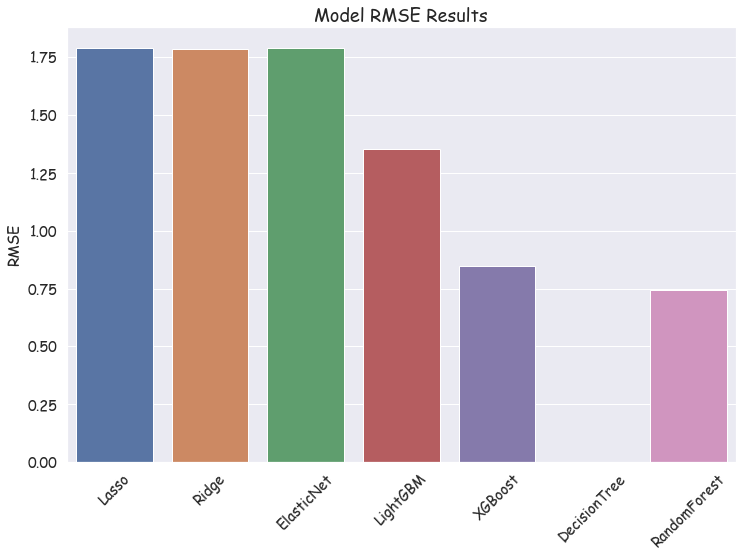

In [241]:
model_list = ['Lasso', 'Ridge', 'ElasticNet', 'LightGBM', 'XGBoost', 'DecisionTree', 'RandomForest']
rmse_list = [lasso_RMSE, ridge_RMSE, elasticnet_RMSE, lgb_RMSE, xgb_RMSE, dtree_RMSE, rf_RMSE]

plt.figure(figsize=(12,8))
sns.barplot(x = model_list, y = rmse_list)
plt.xticks(rotation=45, ha="center")
plt.ylabel("RMSE", fontsize=15)
plt.title("Model RMSE Results", fontsize=18)
plt.show()

In [242]:
# print the result RMSE number
print(f' Lasso = {lasso_RMSE} \n Ridge = {ridge_RMSE}\n Elastic_Net = {elasticnet_RMSE}\n LGBM = {lgb_RMSE}\n XGBoost = {xgb_RMSE}\n Decision Tree = {dtree_RMSE}\n Random Forest = {rf_RMSE} ')

 Lasso = 1.7905255656201569 
 Ridge = 1.787761609578996
 Elastic_Net = 1.7909937320493443
 LGBM = 1.3555010052524896
 XGBoost = 0.8461753962211388
 Decision Tree = 0.0
 Random Forest = 0.7422219176474123 


### R Square Metric Between Training and Testing Sets

In [245]:
dtree_pred_train = dtree.predict(x_train)
dtree_pred_test = dtree.predict(x_test)
dtree_pred_all = dtree.predict(x_final)

rf_pred_train = rf.predict(x_train)
rf_pred_test = rf.predict(x_test)
rf_pred_all = rf.predict(x_final)

lightgbm_train_pred = lightgbm.predict(x_train)
lightgbm_test_pred = lightgbm.predict(x_test)
lightgbm_all_pred = lightgbm.predict(x_final)

xgboost_train_pred = xgboost.predict(x_train)
xgboost_test_pred = xgboost.predict(x_test)
xgboost_all_pred = xgboost.predict(x_final)

x_predictions = x_final.copy()
x_predictions['pred_totalspend_dtree'] = pd.DataFrame(dtree_pred_all, index=x_final.index)
x_predictions['pred_totalspend_rf'] = pd.DataFrame(rf_pred_all, index=x_final.index)
x_predictions['pred_totalspend_lgbm'] = pd.DataFrame(lightgbm_all_pred, index=x_final.index)
x_predictions['pred_totalspend_xgb'] = pd.DataFrame(xgboost_all_pred, index=x_final.index)

In [246]:
x_predictions

,lnlongmon,income,equipmon,pets,tollmon,reside,lnothdebt,card2_3,pred_totalspend_dtree,pred_totalspend_rf,pred_totalspend_lgbm,pred_totalspend_xgb
0,1.871802,31.0,29.50,0.0,29.0,3.0,0.806516,0,8.082407,9.500745,10.072410,10.458363
1,2.186051,15.0,54.85,6.0,0.0,2.0,0.449788,0,6.571463,8.202248,9.480604,7.190889
2,3.346389,35.0,0.00,3.0,0.0,3.0,0.930738,0,10.403805,10.576825,10.878596,10.544619
3,1.791759,20.0,0.00,0.0,0.0,5.0,0.110826,1,10.399363,10.373523,9.688396,10.084027
4,1.115142,23.0,0.00,0.0,16.5,4.0,-1.735336,0,11.416350,10.765654,10.930482,11.605887
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3.529297,196.0,0.00,4.0,0.0,1.0,2.047166,1,14.853996,13.985467,13.560421,14.416498
4996,2.341806,83.0,0.00,1.0,36.5,1.0,2.209746,0,10.454008,11.156658,12.536118,11.749281
4997,3.380995,108.0,0.00,0.0,44.0,1.0,2.092664,0,15.107676,14.115716,13.231703,13.795212
4998,2.073172,189.0,29.55,0.0,0.0,4.0,2.733760,0,14.815677,13.928387,12.417788,11.657968


In [247]:
from sklearn.metrics import r2_score

r_sq_train_dtree = r2_score(dtree_pred_train,y_train)
print("R-squared of training data of Decision Tree", r_sq_train_dtree)
r_sq_train_rf = r2_score(rf_pred_train,y_train)
print("R-squared of training data of Random Forest", r_sq_train_rf)
r_sq_train_lgbm = r2_score(lightgbm_train_pred, y_train)
print("R-squared of training data using Light GBM", r_sq_train_lgbm)
r_sq_train_xgb = r2_score(xgboost_train_pred, y_train)
print("R-squared of training data using XGBoost", r_sq_train_xgb)

R-squared of training data of Decision Tree 1.0
R-squared of training data of Random Forest 0.7245287114180914
R-squared of training data using Light GBM -0.7399155132009538
R-squared of training data using XGBoost 0.6380676199193056


In [248]:
r_sq_test_dtree = r2_score(dtree_pred_test,y_test)
print("R-squared of testing data of Decision Tree", r_sq_test_dtree)
r_sq_test_rf = r2_score(rf_pred_test,y_test)
print("R-squared of testing data of Random Forest", r_sq_test_rf)
r_sq_test_lgbm = r2_score(lightgbm_test_pred, y_test)
print("R-squared of testing data using Light GBM", r_sq_test_lgbm)
r_sq_test_xgb = r2_score(xgboost_test_pred, y_test)
print("R-squared of testing data using XGBoost", r_sq_test_xgb)

R-squared of testing data of Decision Tree -0.5332104030328524
R-squared of testing data of Random Forest -2.298115388895108
R-squared of testing data using Light GBM -2.3579633832970495
R-squared of testing data using XGBoost -1.7274186823060353


As we can see, our results are not good and we are getting negative r-squared values. So we need to optimize our models by hypertuning.

We will be using GridSearchCV() for hypertuning our models.

### Hypertuning our model

In [249]:
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': range(2,10), 'min_samples_split': [150,175,200,225,250]}
tree_grid = GridSearchCV(dtree, cv=10, param_grid=param_dist, n_jobs=-1)
tree_grid.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(2, 10),
                         'min_samples_split': [150, 175, 200, 225, 250]})

In [250]:
print('Best Parameters using grid search: \n', tree_grid.best_params_)

Best Parameters using grid search: 
 {'max_depth': 3, 'min_samples_split': 250}


In [251]:
dtree_new = DecisionTreeRegressor(max_depth=4, min_samples_split=150)
dtree_new.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_split=150)

In [252]:
rf_new = RandomForestRegressor(max_depth=4, min_samples_split=150)
rf_new.fit(x_train, y_train)

RandomForestRegressor(max_depth=4, min_samples_split=150)

In [253]:
lgbm_new = lgb.LGBMRegressor(max_depth=4, subsample_for_bin=150)
lgbm_new.fit(x_train, y_train)

LGBMRegressor(max_depth=4, subsample_for_bin=150)

In [254]:
xgb_new = xgb.XGBRegressor(max_depth=4 )
xgb_new.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [255]:
dtree_pred_train_new = dtree_new.predict(x_train)
dtree_pred_test_new = dtree_new.predict(x_test)
dtree_pred_all_new = dtree_new.predict(x_final)

rf_pred_train_new = rf_new.predict(x_train)
rf_pred_test_new = rf_new.predict(x_test)
rf_pred_all_new = rf_new.predict(x_final)

lightgbm_train_pred_new = lgbm_new.predict(x_train)
lightgbm_test_pred_new = lgbm_new.predict(x_test)
lightgbm_all_pred_new = lgbm_new.predict(x_final)

xgboost_train_pred_new = xgb_new.predict(x_train)
xgboost_test_pred_new = xgb_new.predict(x_test)
xgboost_all_pred_new = xgb_new.predict(x_final)

x_predictions['pred_totalspend_dtree_new'] = pd.DataFrame(dtree_pred_all_new, index=x_final.index)
x_predictions['pred_totalspend_rf_new'] = pd.DataFrame(rf_pred_all_new, index=x_final.index)
x_predictions['pred_totalspend_lgb_new'] = pd.DataFrame(lightgbm_all_pred_new, index=x_final.index)
x_predictions['pred_totalspend_xgb_new'] = pd.DataFrame(xgboost_all_pred_new, index=x_final.index)


In [256]:
r_sq_train_dtree_new = r2_score(y_train, dtree_pred_train_new)
print("R-squared of training data of Decision Tree: ", r_sq_train_dtree_new)

r_sq_test_dtree_new = r2_score(y_test, dtree_pred_test_new)
print("R-squared of testing data of Decision Tree: ", r_sq_test_dtree_new)

r_sq_train_rf_new = r2_score(y_train, rf_pred_train_new)
print("R-squared of training data of Random Forest: ", r_sq_train_rf_new)

r_sq_pred_test_new = r2_score(y_test, rf_pred_test_new)
print("R-squared of testing data of Random Forest: ", r_sq_pred_test_new)

r_sq_train_lgb_new = r2_score(y_train, lightgbm_train_pred_new)
print("R-squared of training data of Light GBM: ", r_sq_train_lgb_new)

r_sq_train_lgb_new = r2_score(y_test, lightgbm_test_pred_new)
print("R-squared of testing data of Light GBM: ", r_sq_train_lgb_new)

r_sq_train_lgb_new = r2_score(y_train, xgboost_train_pred_new)
print("R-squared of training data of XGBoost: ", r_sq_train_lgb_new)

r_sq_train_lgb_new = r2_score(y_test, xgboost_test_pred_new)
print("R-squared of testing data of XGBoost: ", r_sq_train_lgb_new)

R-squared of training data of Decision Tree:  0.1912515557753145
R-squared of testing data of Decision Tree:  0.12226154135895217
R-squared of training data of Random Forest:  0.19992005812025682
R-squared of testing data of Random Forest:  0.14033422058743183
R-squared of training data of Light GBM:  0.30758672281611055
R-squared of testing data of Light GBM:  0.09618385541444807
R-squared of training data of XGBoost:  0.538680647727164
R-squared of testing data of XGBoost:  0.040843629690569316


### Visualizing the model performamce

In [257]:
data_eval = pd.concat([x_predictions, y], axis=1, join='inner')
data_eval.head()

,lnlongmon,income,equipmon,pets,tollmon,reside,lnothdebt,card2_3,pred_totalspend_dtree,pred_totalspend_rf,pred_totalspend_lgbm,pred_totalspend_xgb,pred_totalspend_dtree_new,pred_totalspend_rf_new,pred_totalspend_lgb_new,pred_totalspend_xgb_new,boxcox_totalspent
0,1.871802,31.0,29.50,0.0,29.0,3.0,0.806516,0,8.082407,9.500745,10.072410,10.458363,10.570020,10.652677,10.626660,10.549402,8.082407
1,2.186051,15.0,54.85,6.0,0.0,2.0,0.449788,0,6.571463,8.202248,9.480604,7.190889,10.079554,9.961901,9.599539,8.825225,6.571463
2,3.346389,35.0,0.00,3.0,0.0,3.0,0.930738,0,10.403805,10.576825,10.878596,10.544619,10.958728,10.756516,10.726731,10.787041,10.403805
3,1.791759,20.0,0.00,0.0,0.0,5.0,0.110826,1,10.399363,10.373523,9.688396,10.084027,10.079554,10.108694,9.679443,10.246880,10.399363
4,1.115142,23.0,0.00,0.0,16.5,4.0,-1.735336,0,11.416350,10.765654,10.930482,11.605887,10.079554,10.304527,10.675365,11.464827,11.416350


We are dividing our actual values of the target variable(boxcox_totalspent) into 50 ranks.

In [258]:
data_eval['totalspend_rank'] = pd.qcut(data_eval['boxcox_totalspent'].rank(method='first').values, 
                                       50,
                                       duplicates='drop').codes+1
data_eval

,lnlongmon,income,equipmon,pets,tollmon,reside,lnothdebt,card2_3,pred_totalspend_dtree,pred_totalspend_rf,pred_totalspend_lgbm,pred_totalspend_xgb,pred_totalspend_dtree_new,pred_totalspend_rf_new,pred_totalspend_lgb_new,pred_totalspend_xgb_new,boxcox_totalspent,totalspend_rank
0,1.871802,31.0,29.50,0.0,29.0,3.0,0.806516,0,8.082407,9.500745,10.072410,10.458363,10.570020,10.652677,10.626660,10.549402,8.082407,4
1,2.186051,15.0,54.85,6.0,0.0,2.0,0.449788,0,6.571463,8.202248,9.480604,7.190889,10.079554,9.961901,9.599539,8.825225,6.571463,1
2,3.346389,35.0,0.00,3.0,0.0,3.0,0.930738,0,10.403805,10.576825,10.878596,10.544619,10.958728,10.756516,10.726731,10.787041,10.403805,21
3,1.791759,20.0,0.00,0.0,0.0,5.0,0.110826,1,10.399363,10.373523,9.688396,10.084027,10.079554,10.108694,9.679443,10.246880,10.399363,21
4,1.115142,23.0,0.00,0.0,16.5,4.0,-1.735336,0,11.416350,10.765654,10.930482,11.605887,10.079554,10.304527,10.675365,11.464827,11.416350,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3.529297,196.0,0.00,4.0,0.0,1.0,2.047166,1,14.853996,13.985467,13.560421,14.416498,12.707865,12.461039,12.984371,14.091622,14.853996,49
4996,2.341806,83.0,0.00,1.0,36.5,1.0,2.209746,0,10.454008,11.156658,12.536118,11.749281,11.936053,11.908050,11.417732,12.223202,10.454008,22
4997,3.380995,108.0,0.00,0.0,44.0,1.0,2.092664,0,15.107676,14.115716,13.231703,13.795212,11.936053,12.051449,12.948179,13.154930,15.107676,49
4998,2.073172,189.0,29.55,0.0,0.0,4.0,2.733760,0,14.815677,13.928387,12.417788,11.657968,12.707865,12.460002,12.964624,12.348227,12.653991,42


Let's plot the Actuals versus Predicted across the buckets created

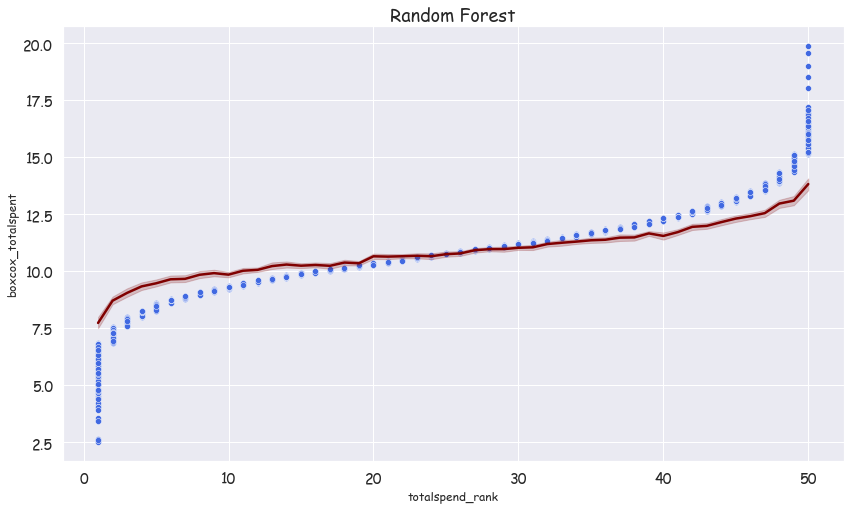

In [259]:
ax = sns.scatterplot(x='totalspend_rank', y='boxcox_totalspent', data=data_eval, color='royalblue')
ax = sns.lineplot(x='totalspend_rank', y='pred_totalspend_rf', data=data_eval, color='maroon')
plt.title("Random Forest", fontsize=18)
plt.show()

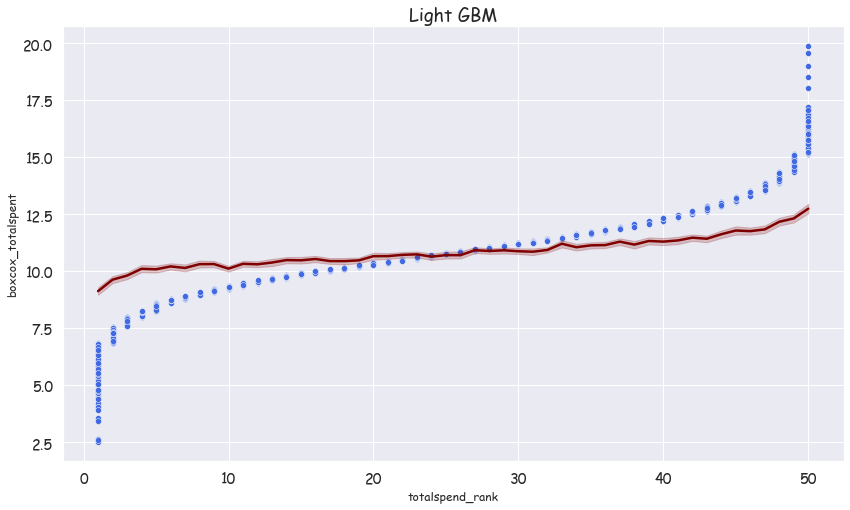

In [260]:
ax = sns.scatterplot(x='totalspend_rank', y='boxcox_totalspent', data=data_eval, color='royalblue')
ax = sns.lineplot(x='totalspend_rank', y='pred_totalspend_lgbm', data=data_eval, color='maroon')
plt.title("Light GBM", fontsize=18)
plt.show()

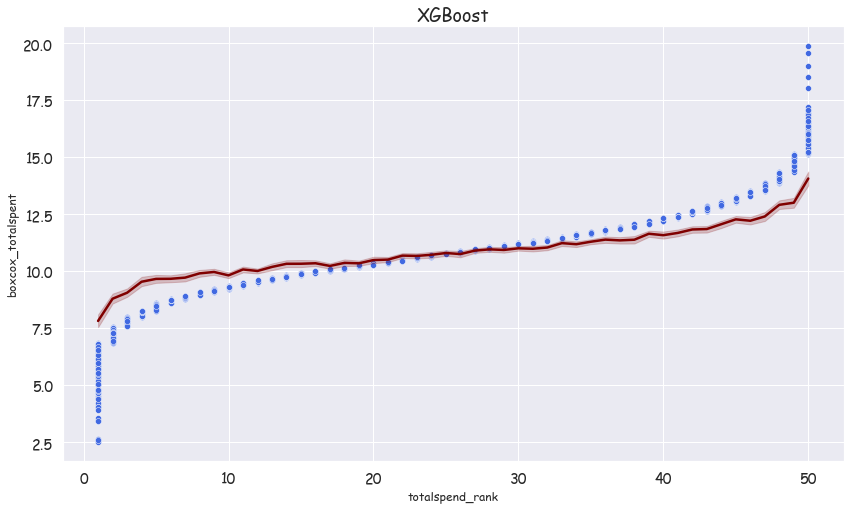

In [261]:
ax = sns.scatterplot(x='totalspend_rank', y='boxcox_totalspent', data=data_eval, color='royalblue')
ax = sns.lineplot(x='totalspend_rank', y='pred_totalspend_xgb', data=data_eval, color='maroon')
plt.title("XGBoost", fontsize=18)
plt.show()

We can see that the plots for Random Forest and XgBoost are almost similar, while Light GBM differs from them. The main aim of this buckets distribution is to see how closely the actual values and the predicted values are distributed.

## Making Predictions

We will be using the Random Forest & the XGBoost models to make our predictions. We will use the test data and will see how the actual value and the predicted values differ from each other.<br>
But first, we have to use the inverse boxcox transform to get our values in the original scale.

In [270]:
# store the result

submission_df=pd.DataFrame(
                        {'Id': x_test.index,
                        'Predicted Spending_rf':inv_boxcox(rf_pred_test, param),
                        'Predicted Spending_xgb': inv_boxcox(xgboost_test_pred, param),
                        'Actual Spending': inv_boxcox(y_test, param) }
                            )


In [271]:
submission_df

,Id,Predicted Spending_rf,Predicted Spending_xgb,Actual Spending
71,71,523.279776,425.147858,542.15
1561,1561,201.403445,294.785248,317.59
2439,2439,206.351592,115.041862,297.39
1294,1294,333.583134,316.057007,358.08
1946,1946,517.005033,592.627991,431.36
...,...,...,...,...
954,954,610.937079,758.970215,710.59
1715,1715,453.063485,552.840637,334.26
919,919,438.204538,669.085754,100.48
2171,2171,325.283561,363.613129,320.92


## Error Cluster Capture

We are going to create a column called error which is the difference between the actual values and the predicted values.<br>
We will find the absolute error percentage, as we are only interested in the magnitude of the error.<br>
We will then perform cluster analysis only on this column to find out which rows have the least errors.

In [272]:
# getting the difference between predicted and actual values
data_eval['Error'] = data_eval['pred_totalspend_rf'] - data_eval['boxcox_totalspent']
data_eval['Error_percent'] = (data_eval['Error']/ data_eval['boxcox_totalspent']).abs()
error_df = data_eval[['Error_percent']]


In [273]:
data_eval

,lnlongmon,income,equipmon,pets,tollmon,reside,lnothdebt,card2_3,pred_totalspend_dtree,pred_totalspend_rf,pred_totalspend_lgbm,pred_totalspend_xgb,pred_totalspend_dtree_new,pred_totalspend_rf_new,pred_totalspend_lgb_new,pred_totalspend_xgb_new,boxcox_totalspent,totalspend_rank,Error,Error_percent
0,1.871802,31.0,29.50,0.0,29.0,3.0,0.806516,0,8.082407,9.500745,10.072410,10.458363,10.570020,10.652677,10.626660,10.549402,8.082407,4,1.418338,0.175485
1,2.186051,15.0,54.85,6.0,0.0,2.0,0.449788,0,6.571463,8.202248,9.480604,7.190889,10.079554,9.961901,9.599539,8.825225,6.571463,1,1.630785,0.248162
2,3.346389,35.0,0.00,3.0,0.0,3.0,0.930738,0,10.403805,10.576825,10.878596,10.544619,10.958728,10.756516,10.726731,10.787041,10.403805,21,0.173020,0.016630
3,1.791759,20.0,0.00,0.0,0.0,5.0,0.110826,1,10.399363,10.373523,9.688396,10.084027,10.079554,10.108694,9.679443,10.246880,10.399363,21,-0.025840,0.002485
4,1.115142,23.0,0.00,0.0,16.5,4.0,-1.735336,0,11.416350,10.765654,10.930482,11.605887,10.079554,10.304527,10.675365,11.464827,11.416350,32,-0.650696,0.056997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3.529297,196.0,0.00,4.0,0.0,1.0,2.047166,1,14.853996,13.985467,13.560421,14.416498,12.707865,12.461039,12.984371,14.091622,14.853996,49,-0.868528,0.058471
4996,2.341806,83.0,0.00,1.0,36.5,1.0,2.209746,0,10.454008,11.156658,12.536118,11.749281,11.936053,11.908050,11.417732,12.223202,10.454008,22,0.702649,0.067213
4997,3.380995,108.0,0.00,0.0,44.0,1.0,2.092664,0,15.107676,14.115716,13.231703,13.795212,11.936053,12.051449,12.948179,13.154930,15.107676,49,-0.991959,0.065659
4998,2.073172,189.0,29.55,0.0,0.0,4.0,2.733760,0,14.815677,13.928387,12.417788,11.657968,12.707865,12.460002,12.964624,12.348227,12.653991,42,1.274395,0.100711


Now, we will create 10 clusters based on the error percentage. For this we will be using the KBinsDiscretizer class from the preprocessing module of sklearn. The 10 bins will be created on the basis of k-means. 

In [274]:
from sklearn.preprocessing import KBinsDiscretizer

bins = KBinsDiscretizer(n_bins=10, strategy='kmeans', encode='ordinal')
error_df_bin = pd.DataFrame(bins.fit_transform(error_df), index=error_df.index, columns=error_df.columns).add_suffix('_bin')
error_df = pd.concat([error_df, error_df_bin], axis=1, join='inner')
error_df

,Error_percent,Error_percent_bin
0,0.175485,3.0
1,0.248162,4.0
2,0.016630,0.0
3,0.002485,0.0
4,0.056997,1.0
...,...,...
4995,0.058471,1.0
4996,0.067213,1.0
4997,0.065659,1.0
4998,0.100711,2.0


The best performing cluster is the 1st cluster(value=0) and we want to find out the descriptives of this cluster. Let's do that by performing a groupby on the error percentage bin column

In [275]:
model_eval = error_df.groupby('Error_percent_bin')['Error_percent'].agg(['min','max','mean','count'])
model_eval['cum_count'] = model_eval['count'].cumsum()
model_eval['cum_count_proportion'] = model_eval['cum_count']/ max(model_eval['cum_count'])
model_eval

,min,max,mean,count,cum_count,cum_count_proportion
Error_percent_bin,,,,,,
0.0,0.000013,0.038619,0.018561,2183,2183,0.4366
1.0,0.038631,0.084291,0.058417,1442,3625,0.7250
2.0,0.084384,0.144672,0.109709,785,4410,0.8820
3.0,0.144977,0.225740,0.179232,347,4757,0.9514
4.0,0.226000,0.330814,0.271878,147,4904,0.9808
5.0,0.333928,0.478558,0.393528,61,4965,0.9930
6.0,0.490623,0.654090,0.565030,19,4984,0.9968
7.0,0.687985,0.839556,0.766153,9,4993,0.9986
8.0,0.914495,1.055157,0.960786,5,4998,0.9996


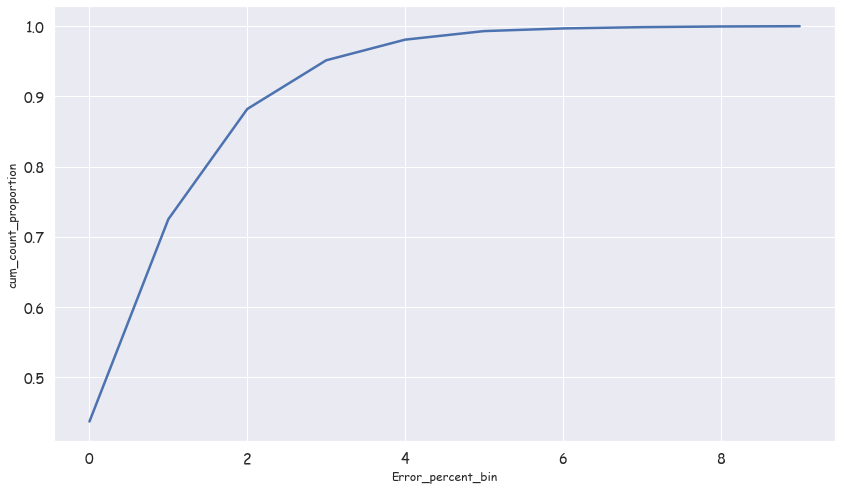

In [276]:
# Visualize the cumulative Observation Capture by Error Clusters

ax=sns.lineplot(x=model_eval.index,y='cum_count_proportion',data=model_eval)
plt.show()

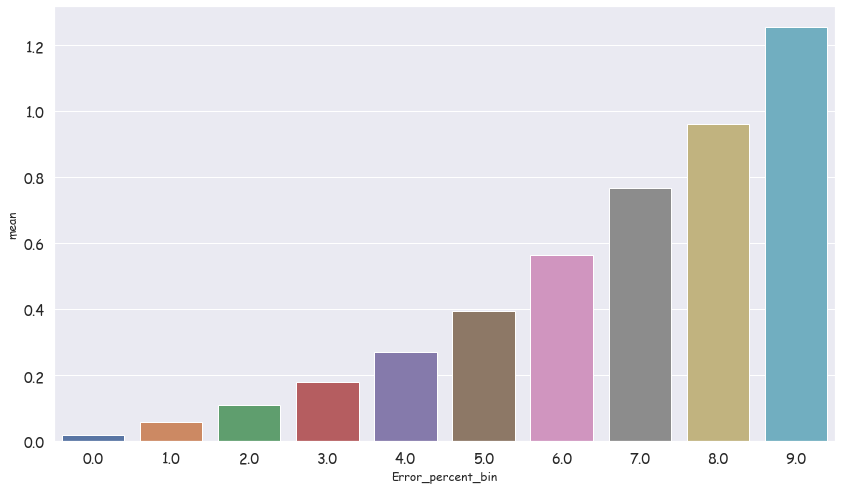

In [277]:
ax=sns.barplot(x=model_eval.index,y='mean',data=model_eval)